<img src="Imagenes/1627656919314.jpg" width=100% align="center"/>

<img src="Imagenes/Presentación1.jpg" width=100% align="center"/>

---------------------------------------------------------------------------------------------------------------------------------

<b><h2 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:30px'>Objetivos:</h2></b>

<ol><li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Exploración y descripción del Dataset. </li><li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Limpieza del dataset y definición de estrategias para datos faltantes. </li>
<li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Crear nuevas columnas con valor predictivo.</li>
<li style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>Análisis descriptivo principales variables.</li></ol>

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>1. Limpieza del dataset y definición de estrategias para datos faltantes.</h3>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'> El dataset a trabajar es properati.csv. Antes de empezar importamos todas las librerías que vamos a necesitar, levantamos el csv y usamos métodos como <i>info()</i> y <i>describe()</i> para obtener un pantallazo general de la información disponible.</p>

In [1]:
%conda install pandas numpy seaborn matplotlib psutil geopandas regex descartes contextily


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.3
  latest version: 4.11.0

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/studio-lab-user/.conda/envs/default

  added / updated specs:
    - contextily
    - descartes
    - geopandas
    - matplotlib
    - numpy
    - pandas
    - psutil
    - regex
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    numpy-1.21.5               |   py39haac66dc_0        18.2 MB  conda-forge
    pandas-1.3.5               |   py39hde0f152_0        13.0 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        31.2 MB

The following packages will be UPDATED:

  numpy                               1.21.4-py39hdbf815f_0 --> 1.21.5-py39haac66dc_0


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import gc
import psutil

In [3]:
#Levantamos el dataset y consultamos las columnas disponibles
df = pd.read_csv('~/Data/properatti.csv', sep = ',', encoding = 'utf-8')
df.columns

Index(['Unnamed: 0', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [4]:
#Cambiamos el nombre de las columnas para facilitar su comprensión
df.columns = ['Indice', 'Operacion', 'Tipo_Propiedad', 'Barrio', 'Barrio_Pcia_Pais', 'País', 'Provincia', 
                  'Geonames_Id','Lat-Lon', 'Lat', 'Lon', 'Precio', 'Moneda', 'Precio_Pesos', 'Precio_Dolar',
                    'Sup_M2', 'Sup_Cubierta', 'M2_Dolar', 'M2_Peso', 'Pisos', 'Dormitorios', 'Expensas', 'URL',
                      'Descripcion', 'Titulo', 'Imagen']


In [5]:
df.head(5)

Indice Operacion Tipo_Propiedad     Barrio  \
0       0      sell             PH  Mataderos   
1       1      sell      apartment   La Plata   
2       2      sell      apartment  Mataderos   
3       3      sell             PH    Liniers   
4       4      sell      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia  Geonames_Id                  Lat-Lon  \
0               Capital Federal    3430787.0  -34.6618237,-58.5088387   
1        Bs.As. G.B.A. Zona Sur    3432039.0  -34.9038831,-57.9643295   
2               Capital Federal    3430787.0  -34.6522615,-58.5229825   
3               Capital Federal    3431333.0  -34.6477969,-58.5164244   
4  Buenos Aires Costa Atlántica    3435548.0  -38.0026256,-57.5494468   

         Lat  ...  Sup_Cubierta     M2_Dolar      M2_Peso  Pisos  Dormitorios  \
0 -34.661824  ...          40.0  1127.272727  1550.000000    NaN          NaN   
1 -34.903883  ...           NaN          NaN          NaN    NaN          NaN   
2 -34.652262  ...          55.0  1309.090909  1309.090909    NaN          NaN   
3 -34.647797  ...           NaN          NaN          NaN    NaN          NaN   
4 -38.002626  ...          35.0  1828.571429  1828.571429    NaN          NaN   

   Expensas                                                URL  \
0       NaN  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1       NaN  http://www.properati.com.ar/15bob_venta_depart...   
2       NaN  http://www.properati.com.ar/15bod_venta_depart...   
3       NaN  http://www.properati.com.ar/15boh_venta_ph_lin...   
4       NaN  http://www.properati.com.ar/15bok_venta_depart...   

                                         Descripcion  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                              Titulo  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
3                       PH 3 amb. cfte. reciclado      
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...   

                                              Imagen  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...  
2  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...  
3  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...  
4  https://thumbs4.properati.com/5/xrRqlNcSI_vs-f...  

[5 rows x 26 columns]

In [6]:
df.describe()

Indice   Geonames_Id           Lat           Lon        Precio  \
count  121220.000000  1.025030e+05  69670.000000  69670.000000  1.008100e+05   
mean    60609.500000  3.574442e+06    -34.626210    -59.266290  4.685259e+05   
std     34993.344153  3.541306e+05      1.980936      2.299922  2.260101e+06   
min         0.000000  3.427208e+06    -54.823985    -75.678931  0.000000e+00   
25%     30304.750000  3.430234e+06    -34.669065    -58.727040  1.100000e+05   
50%     60609.500000  3.433910e+06    -34.597985    -58.480128  1.850000e+05   
75%     90914.250000  3.836668e+06    -34.441299    -58.395908  4.200000e+05   
max    121219.000000  6.948895e+06      4.545843    -53.733330  6.500000e+08   

       Precio_Pesos  Precio_Dolar         Sup_M2   Sup_Cubierta  \
count  1.008100e+05  1.008100e+05   81892.000000  101313.000000   
mean   4.229397e+06  2.397006e+05     233.795328     133.050181   
std    6.904714e+06  3.913239e+05    1782.222147     724.351479   
min    0.000000e+00  0.000000e+00       0.000000       0.000000   
25%    1.583309e+06  8.973388e+04      50.000000      45.000000   
50%    2.558452e+06  1.450000e+05      84.000000      75.000000   
75%    4.675792e+06  2.650000e+05     200.000000     150.000000   
max    8.212711e+08  4.654544e+07  200000.000000  187000.000000   

            M2_Dolar       M2_Peso        Pisos   Dormitorios      Expensas  
count   68617.000000  8.765800e+04  7899.000000  47390.000000  1.426200e+04  
mean     2160.086916  6.912216e+03    17.452336      3.080840  5.009234e+03  
std      2759.288621  2.837864e+04   120.243621      1.860773  1.204403e+05  
min         0.600000  1.510204e+00     1.000000      1.000000  1.000000e+00  
25%      1218.181818  1.550000e+03     1.000000      2.000000  1.000000e+03  
50%      1800.000000  2.213115e+03     3.000000      3.000000  2.000000e+03  
75%      2486.411765  3.355549e+03     6.000000      4.000000  4.000000e+03  
max    206333.333333  4.000000e+06  3150.000000     32.000000  1.000150e+07

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121220 entries, 0 to 121219
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Indice            121220 non-null  int64  
 1   Operacion         121220 non-null  object 
 2   Tipo_Propiedad    121220 non-null  object 
 3   Barrio            121197 non-null  object 
 4   Barrio_Pcia_Pais  121220 non-null  object 
 5   País              121220 non-null  object 
 6   Provincia         121220 non-null  object 
 7   Geonames_Id       102503 non-null  float64
 8   Lat-Lon           69670 non-null   object 
 9   Lat               69670 non-null   float64
 10  Lon               69670 non-null   float64
 11  Precio            100810 non-null  float64
 12  Moneda            100809 non-null  object 
 13  Precio_Pesos      100810 non-null  float64
 14  Precio_Dolar      100810 non-null  float64
 15  Sup_M2            81892 non-null   float64
 16  Sup_Cubierta      10

In [8]:
#Creamos una función que nos permita ver el porcentaje de nulos de forma más clara

def nulos_col_info(dataframe):
    '''Calcula e imprime el % de nulos por columna de un dataframe. Lo devuelve por si hay que usarlo'''
    df = pd.DataFrame(dataframe)
    nulos_info_col = round((df.isnull().sum() / df.shape[0]) * 100, 2).sort_values(ascending = False)
    return nulos_info_col

In [9]:
nulos = pd.DataFrame(nulos_col_info(df), columns=['%Nulos'])
nulos

%Nulos
Pisos              93.48
Expensas           88.23
Dormitorios        60.91
M2_Dolar           43.39
Lat-Lon            42.53
Lat                42.53
Lon                42.53
Sup_M2             32.44
M2_Peso            27.69
Precio_Pesos       16.84
Precio             16.84
Moneda             16.84
Precio_Dolar       16.84
Sup_Cubierta       16.42
Geonames_Id        15.44
Imagen              2.57
Barrio              0.02
Operacion           0.00
Provincia           0.00
País                0.00
Barrio_Pcia_Pais    0.00
Tipo_Propiedad      0.00
URL                 0.00
Descripcion         0.00
Titulo              0.00
Indice              0.00

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para trabajarlo un poco vamos a eliminar las columnas:</p>
<ul>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Indice (redundante)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Operación (son todas sell)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Pisos (por nulos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Expensas (por nulos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>M2_Peso (no fiable por depender de la cotización diaria)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Precio_Pesos (idem anterior)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Precio (a veces se corresponde con Precio_Dolar y a veces con Precio_Pesos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Moneda (siempre va a ser dólar)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Geonames_Id (no aporta información útil)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>URL (los links están caídos)</li>
<li type="disc" style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Imagen (no la vamos a usar)</li></ul>

In [10]:
#Eliminamos las columnas indicadas y guardamos el resultado en un nuevo dataframe "df_filtrado"

df_filtrado = df.drop(['Indice', 'Operacion', 'Pisos', 'Expensas', 'M2_Peso', 'Precio', 'Precio_Pesos', 'Moneda', 
                        'Geonames_Id', 'URL', 'Imagen'], axis = 1)
gc.collect()
len(df_filtrado)

121220

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>2. Limpieza del dataset y definición de estrategias para datos faltantes.</h3>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para decidir que estrategias seguir con las columnas con datos nulos, determinamos cuáles son las columnas que nos pueden ayudar a determinar como se comporta el precio de las propiedades y de estas, cuales se pueden imputar siguiendo algún criterio lógico. Pisos y Expensas las eliminamos previamente porque era tan alto el índice de nulos que no valía la pena analizar. Las columnas con las que vamos a trabajar son: ['Sup_Cubierta', 'Precio_Dolar', 'Barrio', 'Tipo_Propiedad', 'Sup_M2', 'Dormitorios', 'Descripcion'].</p>


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.1 Imputación Sup_Cubierta</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Para la columna Sup_Cubierta que solo tiene un 16% de datos nulos, vamos a imputar por la media agrupada por Barrio y por Tipo_Propiedad. Antes de calcular la media y para evitar distorsiones vamos a eliminar los outliers también de forma agrupada y eliminando los datos que están a más de dos desvíos del promedio. Un vez que tengamos la media por barrio y por tipo de propiedad, vamos a insertarla en df_filtrado a través de un merge y luego usarla para imputar los nulos en Sup_Cubierta. </p>

In [11]:
#Filtramos outliers de 'Sup_Cubierta'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_cubierta = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Sup_Cubierta'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)

len(df_sin_outliers_cubierta)

97953

In [12]:
#Calculo media sup_cubierta por barrio y por tipo de propiedad
sup_cub_promedio = df_sin_outliers_cubierta.groupby(['Barrio', 'Tipo_Propiedad'])[['Sup_Cubierta']].mean()
sup_cub_promedio.rename(columns = {'Sup_Cubierta':'Sup_Cub_Prom'}, inplace = True)


In [13]:
#Mergeamos el dataframe sup_cub_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, sup_cub_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [14]:
#Finalmente imputamos los datos faltantes en Sup_Cubierta:
df_filtrado.Sup_Cubierta.fillna(df_filtrado.Sup_Cub_Prom, inplace=True)

In [15]:
#Eliminamos los DataFrame provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del sup_cub_promedio
del df_sin_outliers_cubierta
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

90.3673756415257
90.37341237095875


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.2 Imputación Precio_Dolar</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Precio_Dolar es muy similar en su composición a la Sup_Cubierta por lo cual vamos a seguir idéntica estrategia. </p>

In [16]:
#Filtramos outliers de 'Precio_Dolar'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_precio = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Precio_Dolar'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)
len(df_sin_outliers_precio)

96384

In [17]:
#Calculo media precio_dolar por barrio y por tipo de propiedad:

precio_promedio = df_sin_outliers_precio.groupby(['Barrio', 'Tipo_Propiedad'])[['Precio_Dolar']].mean()
precio_promedio.rename(columns = {'Precio_Dolar':'Precio_Dolar_Prom'}, inplace = True)

In [18]:
#Mergeamos el dataframe precio_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, precio_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [19]:
#Finalmente imputamos los datos faltantes en Precio_Dolar_Prom:
df_filtrado.Precio_Dolar.fillna(df_filtrado.Precio_Dolar_Prom, inplace=True)

In [20]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_precio
del precio_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

90.2891445560158
90.29207668174043


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.3 Imputación Sup_M2</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Sup_M2 a diferencia de Sup_Cubierta tiene 32% de datos nulos. En consecuencia vamos a seguir dos estrategias, la primera, imputar por la media como venimos haciendo y luego para los nulos que nos queden, imputaremos los datos de la columna Sup_Cubierta, asumiendo para esos casos que la propiedad no tiene espacios descubiertos. </p>

In [21]:
#Filtramos outliers de 'Sup_M2'
def es_outlier(s):
    
    lower_limit = s.mean() - (s.std() * 2)
    upper_limit = s.mean() + (s.std() * 2)
    return ~s.between(lower_limit, upper_limit)

df_sin_outliers_m2 = df_filtrado[~df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'], dropna=False)['Sup_M2'].apply(es_outlier)]
#df_sin_outliers.reset_index(drop=True, inplace=True)

len(df_sin_outliers_m2)

78871

In [22]:
#Calculo media Sup_m2 por barrio y por tipo de propiedad:

supm2_promedio = df_sin_outliers_m2.groupby(['Barrio', 'Tipo_Propiedad'])[['Sup_M2']].mean()
supm2_promedio.rename(columns = {'Sup_M2':'Sup_M2_Prom'}, inplace = True)

In [23]:
#Mergeamos el dataframe sup_m2_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, supm2_promedio, on=['Barrio', 'Tipo_Propiedad'], how='left')

In [24]:
#Imputamos los datos faltantes en Sup_m2:
df_filtrado.Sup_M2.fillna(df_filtrado.Sup_M2_Prom, inplace=True)

In [25]:
#Imputamos los últimos datos faltantes en Sup_m2:
df_filtrado.Sup_M2.fillna(df_filtrado.Sup_Cubierta, inplace=True)

In [26]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_m2
del supm2_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

90.28559643749189
90.28712409963413


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.4 Imputación Barrio.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Barrio tiene muy pocos datos nulos. Luego de observar los datos nulos pudimos determinar que son 23 casos y gracias a la columna Barrio_Pcia_Pais vemos todos pertenecen a Tigre. Imputamos por el valor 'Tigre'. </p>

In [27]:
df[df.Barrio.isnull() == True]

Indice Operacion Tipo_Propiedad Barrio  \
6489     6489      sell          house    NaN   
10201   10201      sell          house    NaN   
11451   11451      sell          house    NaN   
14839   14839      sell          house    NaN   
18622   18622      sell          house    NaN   
21922   21922      sell          house    NaN   
23664   23664      sell          house    NaN   
24722   24722      sell          house    NaN   
38856   38856      sell          house    NaN   
45970   45970      sell      apartment    NaN   
46642   46642      sell          house    NaN   
53130   53130      sell          house    NaN   
55306   55306      sell          house    NaN   
57703   57703      sell          house    NaN   
57759   57759      sell          house    NaN   
57764   57764      sell          house    NaN   
57793   57793      sell          house    NaN   
58004   58004      sell          house    NaN   
58037   58037      sell          house    NaN   
59069   59069      sell          house    NaN   
62411   62411      sell          house    NaN   
62413   62413      sell          house    NaN   
63849   63849      sell          house    NaN   

                                  Barrio_Pcia_Pais       País  \
6489   |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
10201  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
11451  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
14839  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
18622  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
21922  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
23664  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
24722  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
38856  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
45970  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
46642  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
53130  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
55306  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
57703  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
57759  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
57764  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
57793  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
58004  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
58037  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
59069  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
62411  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
62413  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   
63849  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre||  Argentina   

                      Provincia  Geonames_Id                        Lat-Lon  \
6489   Bs.As. G.B.A. Zona Norte          NaN    -34.4008968545,-58.63809847   
10201  Bs.As. G.B.A. Zona Norte          NaN          -34.400704,-58.638067   
11451  Bs.As. G.B.A. Zona Norte          NaN  -34.4026880384,-58.6262613379   
14839  Bs.As. G.B.A. Zona Norte          NaN  -34.4007994779,-58.6381735719   
18622  Bs.As. G.B.A. Zona Norte          NaN  -34.4032781195,-58.6263503945   
21922  Bs.As. G.B.A. Zona Norte          NaN          -34.399704,-58.638405   
23664  Bs.As. G.B.A. Zona Norte          NaN  -34.4005161998,-58.6417999185   
24722  Bs.As. G.B.A. Zona Norte          NaN        -34.4007292,-58.6377783   
38856  Bs.As. G.B.A. Zona Norte          NaN         -34.425087,-58.5796585   
45970  Bs.As. G.B.A. Zona Norte          NaN           -34.396074,-58.63738   
46642  Bs.As. G.B.A. Zona Norte          NaN          -34.400749,-58.638754   
53130  Bs.As. G.B.A. Zona Norte          NaN          -34.400978,-58.637809   
55306  Bs.As. G.B.A. Zona Norte          NaN        -34.3996311,-58.6433121   
57703  Bs.As. G.B.A. Zona Norte          NaN      -34.39033749,-58.63368988   
57759  Bs.As. G.B.A. Zona Norte          NaN      -34.39596815,-58.63077164   
57764

In [28]:
#Imputamos los datos faltantes en Barrio:
df_filtrado.Barrio.fillna('Tigre', inplace=True)

---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>2.5 Imputación Dormitorios.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>La columna Dormitorios tiene 60% de datos nulos. A pesar de eso vamos a tratar de determinar una media de dormitorios por m2. Para ellos primero vamos a filtrar los outliers, los nulos y los correspondientes a 'store' (porque no deberían tener dormitorios). Luego cruzando Sup_Cubierta con Dormitorios vamos a tratar de determinar cual el metraje promedio por cada dormitorio. Estamos asumiendo varias cosas sobre pocas observaciones, motivo por el cual este dato será utilizado con mucha cautela.
Para eliminar los outliers nos basamos en lo que observamos del data set, donde practicamente no hay viviendas con más de 15 dormitorios.</p>

In [29]:
#Filtramos outliers de 'Dormitorios'
df_sin_outliers_dormitorios= df_filtrado[df_filtrado.Tipo_Propiedad != 'store']

df_sin_outliers_dormitorios = df_filtrado[df_filtrado.Dormitorios < 15]

len(df_sin_outliers_dormitorios)

47285

In [30]:
#Creamos una nueva columna en df_sin_outliers_dormitorios que relacione Sup_Cubierta con Dormitorios.
df_sin_outliers_dormitorios['M2_Dormitorios_Prom'] = round(df_sin_outliers_dormitorios.Sup_Cubierta / df_sin_outliers_dormitorios.Dormitorios, 0)
df_sin_outliers_dormitorios.describe()

/tmp/ipykernel_130/371266019.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sin_outliers_dormitorios['M2_Dormitorios_Prom'] = round(df_sin_outliers_dormitorios.Sup_Cubierta / df_sin_outliers_dormitorios.Dormitorios, 0)


Lat           Lon  Precio_Dolar         Sup_M2  Sup_Cubierta  \
count  42077.000000  42077.000000  4.664500e+04   47075.000000  47049.000000   
mean     -34.817206    -59.205040  2.176770e+05     197.785939    106.177688   
std        2.129619      2.371926  3.573654e+05    1499.619745    342.299748   
min      -53.801885    -75.678931  0.000000e+00       1.000000      1.000000   
25%      -34.724684    -58.695896  8.973388e+04      56.153846     45.000000   
50%      -34.602334    -58.464647  1.360253e+05      77.000000     66.915126   
75%      -34.447361    -58.374815  2.270829e+05     200.000000    124.000000   
max        4.545843    -54.580727  4.654544e+07  200000.000000  49000.000000   

            M2_Dolar   Dormitorios  Sup_Cub_Prom  Precio_Dolar_Prom  \
count   25194.000000  47285.000000  46840.000000       4.645600e+04   
mean     2631.051087      3.044877     95.473475       1.831619e+05   
std      4124.178635      1.684817     61.664052       1.222036e+05   
min         0.600000      1.000000     20.000000       1.111100e+04   
25%      1318.020142      2.000000     58.508906       9.927510e+04   
50%      1968.122936      3.000000     66.693182       1.502989e+05   
75%      2626.262626      4.000000    124.722222       2.266014e+05   
max    206333.333333     14.000000   2796.666667       3.224375e+06   

        Sup_M2_Prom  M2_Dormitorios_Prom  
count  46461.000000         47049.000000  
mean     160.839866            35.830581  
std      435.998470           138.001564  
min       32.000000             0.000000  
25%       62.253990            22.000000  
50%       75.494173            28.000000  
75%      207.408451            38.000000  
max    27879.166667         24500.000000

In [31]:
#Calculo media Dormitorios por barrio y por tipo de propiedad:

m2_dormitorios_promedio = df_sin_outliers_dormitorios.groupby(['Tipo_Propiedad'])[['M2_Dormitorios_Prom']].mean()

In [32]:
#Mergeamos el dataframe dormitorios_promedio con df_filtrado
df_filtrado = pd.merge(df_filtrado, m2_dormitorios_promedio, on=['Tipo_Propiedad'], how='left')

In [33]:
#Creamos la columna que estima la cantidad de dormitorios según superficie cubierta
df_filtrado['Dormitorios_Prom'] = round(df_filtrado.Sup_Cubierta /df_filtrado.M2_Dormitorios_Prom, 0)

In [34]:
#Imputamos los datos faltantes en Dormitorios:
df_filtrado.Dormitorios.fillna(df_filtrado.Dormitorios_Prom, inplace=True)

In [35]:
#Eliminamos DataFrames provisorios
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_sin_outliers_dormitorios
del m2_dormitorios_promedio
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

90.2841919739095
90.2841919739095


---------------------------------------------------------------------------------------------------------------------------------

In [36]:
#Por últimos eliminamos las columnas de valores promedio que creamos.
df_filtrado = df_filtrado.drop(['Precio_Dolar_Prom', 'Sup_Cub_Prom', 'Dormitorios_Prom', 'Sup_M2_Prom','M2_Dormitorios_Prom'], axis = 1)
gc.collect()


0

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>3. Creación de columnas con valor predictivo.</h3>

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.1 Columna espacio descubierto.</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>A partir de la diferencia entre superficie total (Sup_M2) y la superficia cubierta (Sup_Cubierta), calculamos una nueva variable llamada Espacio_Descubierto para  indicar las propiedades que tienen espacios al aire libre. No nos quedamos con el resultado de la diferencia entre las dos columnas, sino que indicamos con 1 aquellos que lo tienen y 0 a los que no. Una vez calculada la incorporamos a al dataset.</p>

In [37]:
patio = pd.Series(df_filtrado.apply(lambda x: 1 if x['Sup_M2'] > x['Sup_Cubierta'] else 0, axis = 1), 
                   name = 'Espacio_Descubierto')

df_filtrado = df_filtrado.join(patio, how='left')


In [38]:
df_filtrado.Espacio_Descubierto.sum()

83140

---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.2 Columna Valor_M2_Promedio</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Posteriormente vamos a calcular el valor promedio del M2. Para esto vamos a usar los datos de Sup_Cubierta y Precio_Dolar. Antes de empezar con los cálculos verificamos que no haya datos con formatos incorrectos en ambas columnas.</p>

In [39]:
#Controlo que todos los datos de Sup_Cubierta sean tipo float
a = [x for x in df_filtrado.Sup_Cubierta if type(x) != float]
print(f'Los datos de Sup_Cubierta con formato erróneo son: {len(a)}')

#Hago lo mismo con Precio_Dolar
a = [x for x in df_filtrado.Precio_Dolar if type(x) != float]
print(f'Los datos de Precio_Dolar con formato erróneo son: {len(a)}')





Los datos de Sup_Cubierta con formato erróneo son: 0
Los datos de Precio_Dolar con formato erróneo son: 0


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Ahora filtramos el dataset para quedarnos unicamente con las filas donde tengo información sobre Barrio, Sup_Cubierta y Precio_Dolar simultáneamente, porque son las filas que me van a permitir calcular el promedio del M2 construido según la ubicación.</p>

In [40]:
df_filtrado = df_filtrado[(df_filtrado.Sup_Cubierta.isnull() == False) & (df_filtrado.Precio_Dolar.isnull() == False) & (df_filtrado.Barrio.isnull() == False)]
df_filtrado = df_filtrado[df_filtrado.Sup_Cubierta > 1]
print(len(df_filtrado))

#Reviso que no tenga nulos en las columnas de mi interes:
nulos_col_info(df_filtrado)

119382


Lat-Lon                42.67
Lat                    42.67
Lon                    42.67
M2_Dolar               42.66
Tipo_Propiedad          0.00
Barrio                  0.00
Barrio_Pcia_Pais        0.00
País                    0.00
Provincia               0.00
Precio_Dolar            0.00
Sup_M2                  0.00
Sup_Cubierta            0.00
Dormitorios             0.00
Descripcion             0.00
Titulo                  0.00
Espacio_Descubierto     0.00
dtype: float64

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Creamos una columna 'M2_Dolar_2' donde calculamos el valor del M2 cubierto en dólares.</p>

In [41]:
df_filtrado['M2_Dolar_2'] = df_filtrado['Precio_Dolar'] / df_filtrado['Sup_Cubierta']
print(round(df_filtrado['M2_Dolar_2'].describe(),2))
print(df_filtrado.M2_Dolar_2.quantile(0.985))
print(df_filtrado.M2_Dolar_2.quantile(0.015))

count     119382.00
mean        2428.36
std         4525.52
min            0.00
25%         1298.74
50%         1852.28
75%         2642.86
max      1022831.38
Name: M2_Dolar_2, dtype: float64
11307.148288572933
390.5163871951219


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Filtramos los valores de M2_Dolar_2 exagerados. Vamos a considerar un punto de corte de uSs11.500 que deja afuera al 1,5% de valores más altos y un límite inferior de 300 que deja afuera menos del 1,5% de valores más bajos.

In [42]:
df_filtrado = df_filtrado[(df_filtrado.M2_Dolar_2 > 300) & (df_filtrado.M2_Dolar_2 < 11500)]
len(df_filtrado)

116506

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Una vez realizado esto calculamos el valor del M2 promedio en dólares por barrio y tipo de propiedad.</p>

In [43]:
df_valor_m2 = df_filtrado.groupby(['Barrio', 'Tipo_Propiedad'])[['M2_Dolar_2']].mean()
df_valor_m2.rename(columns={'M2_Dolar_2':'M2_Dolar_Prom'}, inplace=True)
print(df_valor_m2.head(4))
df_valor_m2.describe()

                                        M2_Dolar_Prom
Barrio                  Tipo_Propiedad               
 Country Maschwitz Club house             1303.311966
 los alamos             apartment         1990.243902
9 de Abril              house              687.500000
                        store              750.000000


M2_Dolar_Prom
count    1773.000000
mean     1736.656773
std       965.342070
min       311.665183
25%      1119.924901
50%      1524.612638
75%      2074.237156
max     10000.000000

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Incorporamos la nueva columna df_filtrado</p>

In [44]:
#Agregamos la columna M2_Dolar_Prom en df_filtrado:
df_filtrado = pd.merge(df_filtrado, df_valor_m2, on=['Barrio', 'Tipo_Propiedad'], how='left')
df_filtrado.head(3)


Tipo_Propiedad     Barrio                             Barrio_Pcia_Pais  \
0             PH  Mataderos        |Argentina|Capital Federal|Mataderos|   
1      apartment   La Plata  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|   
2      apartment  Mataderos        |Argentina|Capital Federal|Mataderos|   

        País               Provincia                  Lat-Lon        Lat  \
0  Argentina         Capital Federal  -34.6618237,-58.5088387 -34.661824   
1  Argentina  Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2  Argentina         Capital Federal  -34.6522615,-58.5229825 -34.652262   

         Lon  Precio_Dolar     Sup_M2  Sup_Cubierta     M2_Dolar  Dormitorios  \
0 -58.508839       62000.0  55.000000     40.000000  1127.272727          1.0   
1 -57.964330      150000.0  68.867347     66.915126          NaN          2.0   
2 -58.522982       72000.0  55.000000     55.000000  1309.090909          2.0   

                                         Descripcion  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                              Titulo  Espacio_Descubierto  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB                    1   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...                    1   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO                    0   

    M2_Dolar_2  M2_Dolar_Prom  
0  1550.000000    1988.965879  
1  2241.645632    1703.091783  
2  1309.090909    2135.501737

In [45]:
#Borramos el dataframe provisorio:
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)
del df_valor_m2
gc.collect()
print(psutil.virtual_memory().available * 100 / psutil.virtual_memory().total)

90.39642586194024
90.39642586194024


<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'>Creamos una serie, con la diferencia de M2_Dolar_Prom con M2_Dolar_2 para evaluar como se comporta el valor promedio.</p>

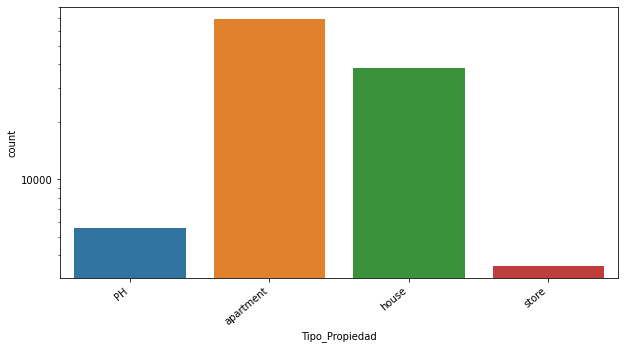

In [46]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import ScalarFormatter
from matplotlib import gridspec

plt.figure(figsize=(10,5))
plt.yscale('log')
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
ax = sns.countplot(data = df_filtrado, x = "Tipo_Propiedad")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha="right")


plt.show()

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: There are no gridspecs with layoutboxes. Possibly did not call parent GridSpec with the figure= keyword
  fig.canvas.print_figure(bytes_io, **kw)


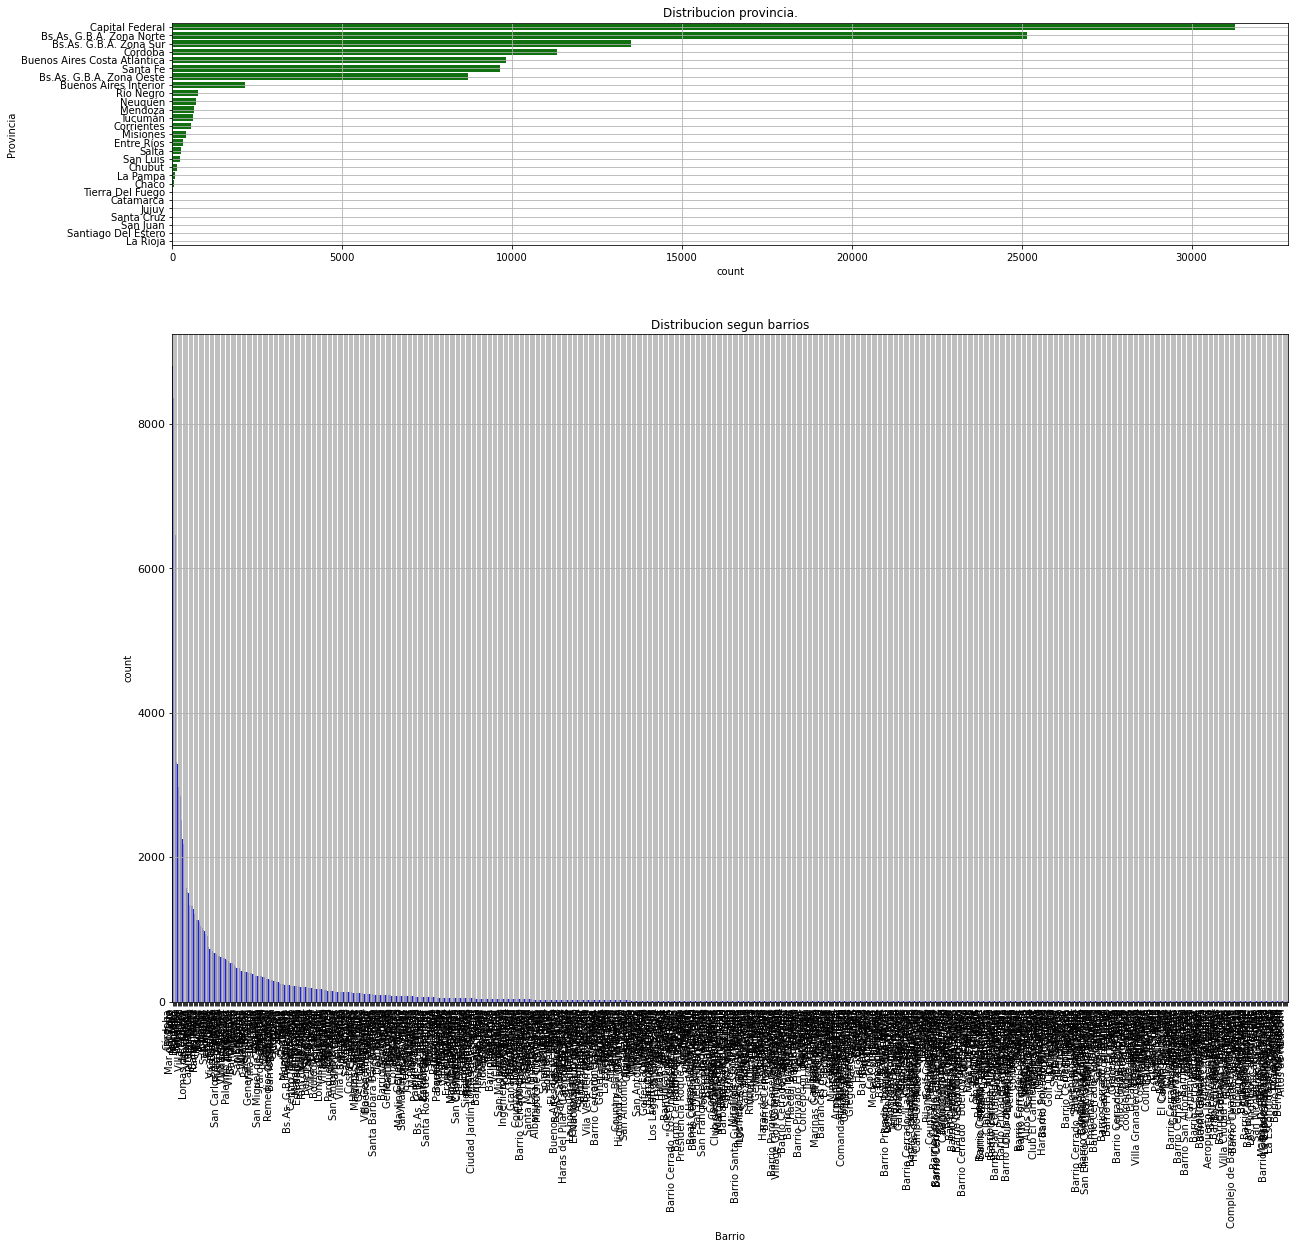

In [47]:
fig= plt.subplots(figsize=(20,18),constrained_layout=True)
grid = gridspec.GridSpec(2, 1, height_ratios=[1, 3])

ax1=plt.subplot(grid[0])
sns.countplot(data=df_filtrado,y="Provincia",order=df_filtrado["Provincia"].value_counts().index,ax=ax1,color="g")

ax1.set_yticklabels(ax1.get_yticklabels(),fontsize="medium")
ax1.set_title("Distribucion provincia.", fontsize= 'large')

ax2=plt.subplot(grid[1])
sns.countplot(data=df_filtrado,x="Barrio",order=df_filtrado["Barrio"].value_counts().index,ax=ax2,color="b")


ax2.set_title("Distribucion segun barrios", fontsize= 'large')
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=90,ha="right")
plt.yticks(fontsize= 11)
ax1.grid()
ax2.grid()
plt.show()

count    116506.00
mean         -0.00
std         983.22
min       -9978.33
25%        -254.67
50%         108.88
75%         465.78
max        6407.22
Name: Error, dtype: float64

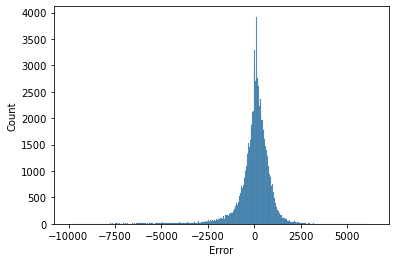

In [48]:
error = pd.Series(df_filtrado['M2_Dolar_Prom'] - df_filtrado['M2_Dolar_2'], name = 'Error')
sns.histplot(data=error)
round(error.describe(),2)


---------------------------------------------------------------------------------------------------------------------------------

<h4 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:20px'>3.3 Columna Amenities</h4>

<p style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:14px'> Utilizando expresiones regulares vamos a  extraer información útil de la columna 'Descripción'. Con la biblioteca re vamos a definir patrones que nos permitan identificar "amenities". Vamos a crear una columna por cada amenitie y en el caso que la propiedad la tenga lo vamos a reflejar con un 1, caso contrario, 0. Por últimos creamos una columna que acumule todas las amenities que esa propiedad tenía.</p>


In [49]:
#Pasamos todo el campo descripción a mayúsculas
a =df_filtrado.Descripcion.apply(lambda x: type(x))

df_filtrado['Tipo_Descripcion'] = a
df_filtrado = df_filtrado[df_filtrado['Tipo_Descripcion'] != float]
df_filtrado['Descripcion'] = df_filtrado.Descripcion.apply(lambda x: x.upper())

In [50]:
import re
#armamos el patron del grupo pileta
pattern_nombre_pileta = "(?P<pileta>\spileta|piscina|Piscina|Pileta|PISCINA|PILETA|PILTEA|PICSINA|pileta.|piscina.|Piscina.|Pileta.|PISCINA.|PILETA.|PILTEA.|PICSINA.)"
#compilamos el patron
pattern_nombre_regex_pileta = re.compile(pattern_nombre_pileta)
#Convertimos la Serie en tipo string
descripcion_series = df_filtrado.Descripcion.apply(str)
#Buscamos el match de las palabras que describen "pileta" en la serie
resultado_pileta = descripcion_series.apply(lambda x: pattern_nombre_regex_pileta.search(x))
#pasamos la serie pileta_match a binario. en caso de tener pileta, tomara el valor de 1. sera 0 en el otro caso.
pileta_match = resultado_pileta.apply(lambda x: x if x is None else x.group('pileta'))
pileta_match=pileta_match.apply(lambda x: 0 if x is None else 1)
df_amenities=pd.DataFrame()
df_amenities['Pileta']=pileta_match
df_amenities.head()

Pileta
0       0
1       0
2       0
3       0
4       0

In [51]:
#armo el patron del grupo cochera
pattern_nombre_cochera = "(?P<cochera>\scochera|Cochera|Garage|garage|COCHERA|GARAGE|GARAJE|Garaje|garaje|Estacionamiento|ESTACIONAMIENTO)"
#compilo el patron
pattern_nombre_regex_cochera = re.compile(pattern_nombre_cochera)
#Busco el match de las palabras que describen "cochera" en la serie
resultado_cochera = descripcion_series.apply(lambda x: pattern_nombre_regex_cochera.search(x))
#print(type(resultado_cochera))
#resultado_cochera
#paso la serie cohera_match a binario. en caso de tener cochera, tomara el valor de 1. sera 0 en el otro caso
cochera_match = resultado_cochera.apply(lambda x: x if x is None else x.group('cochera'))
cochera_match=cochera_match.apply(lambda x: 0 if x is None else 1)
#check2= cochera_match[cochera_match!=None]
#print(check2.value_counts())
df_filtrado['Cochera']=cochera_match
df_filtrado.head()

Tipo_Propiedad     Barrio  \
0             PH  Mataderos   
1      apartment   La Plata   
2      apartment  Mataderos   
3             PH    Liniers   
4      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia                  Lat-Lon        Lat  \
0               Capital Federal  -34.6618237,-58.5088387 -34.661824   
1        Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2               Capital Federal  -34.6522615,-58.5229825 -34.652262   
3               Capital Federal  -34.6477969,-58.5164244 -34.647797   
4  Buenos Aires Costa Atlántica  -38.0026256,-57.5494468 -38.002626   

         Lon  Precio_Dolar      Sup_M2  Sup_Cubierta     M2_Dolar  \
0 -58.508839       62000.0   55.000000     40.000000  1127.272727   
1 -57.964330      150000.0   68.867347     66.915126          NaN   
2 -58.522982       72000.0   55.000000     55.000000  1309.090909   
3 -58.516424       95000.0  107.980392     70.016667          NaN   
4 -57.549447       64000.0   35.000000     35.000000  1828.571429   

   Dormitorios                                        Descripcion  \
0          1.0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1          2.0  VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...   
2          2.0  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3          3.0  PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...   
4          1.0  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                              Titulo  Espacio_Descubierto  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB                    1   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...                    1   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO                    0   
3                       PH 3 amb. cfte. reciclado                       1   
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...                    0   

    M2_Dolar_2  M2_Dolar_Prom Tipo_Descripcion  Cochera  
0  1550.000000    1988.965879    <class 'str'>        0  
1  2241.645632    1703.091783    <class 'str'>        1  
2  1309.090909    2135.501737    <class 'str'>        0  
3  1356.819805    2062.630423    <class 'str'>        0  
4  1828.571429    1905.514948    <class 'str'>        0

In [52]:
#armamos el patron del grupo parrilla
pattern_nombre_parrilla = "(?P<parrilla>\sparrilla|Parrilla|Parrillero|PARRILLA|Parila|Parilla|Parrila|PARRILLERO)"
#compilamos el patron
pattern_nombre_regex_parrilla = re.compile(pattern_nombre_parrilla)
#Buscamos el match de las palabras que describen "parrilla" en la serie
resultado_parrilla = descripcion_series.apply(lambda x: pattern_nombre_regex_parrilla.search(x))
#pasamos la serie parrila_match a binario. en caso de tener parrilla, tomara el valor de 1. sera 0 en el otro caso
parrilla_match = resultado_parrilla.apply(lambda x: x if x is None else x.group('parrilla'))
parrilla_match=parrilla_match.apply(lambda x: 0 if x is None else 1)
df_amenities['Parrilla']=parrilla_match
df_amenities.head()

Pileta  Parrilla
0       0         0
1       0         0
2       0         0
3       0         0
4       0         0

In [53]:
#armamos el patron del grupo "Salon de usos multiples"(SUM)
pattern_nombre_SUM = "(?P<SUM>\sSalon\sde\susos\smultiples|salon\sde\susos\smultiples|Salon\sde\sUsos\sMultiples|Salón\sde\sUsos\sMúltiples|salón\sde\susos\smúltiples|SUM|sum|Sum|Quincho|QUINCHO|quincho)"
#compilamos el patron
pattern_nombre_regex_SUM = re.compile(pattern_nombre_SUM)
#Buscamos el match de las palabras que describen "SUM" en la serie
resultado_SUM = descripcion_series.apply(lambda x: pattern_nombre_regex_SUM.search(x))
#pasamos la serie SUM_match a binario. en caso de tener SUM, tomara el valor de 1. sera 0 en el otro caso
SUM_match = resultado_SUM.apply(lambda x: x if x is None else x.group('SUM'))
SUM_match=SUM_match.apply(lambda x: 0 if x is None else 1)
df_amenities['SUM']=SUM_match
df_amenities.head()

Pileta  Parrilla  SUM
0       0         0    0
1       0         0    0
2       0         0    0
3       0         0    0
4       0         0    0

In [54]:
#armamos el patron del grupo "gimnasio"
pattern_nombre_gym = "(?P<gimnasio>\sGYM|gym|gimnasio|GIMNASIO|GIM|gim|Gym|Gimnasio)"
#compilamos el patron
pattern_nombre_regex_gym = re.compile(pattern_nombre_gym)
#Buscamos el match de las palabras que describen "gimnasio" en la serie
resultado_gym = descripcion_series.apply(lambda x: pattern_nombre_regex_gym.search(x))
#pasamos la serie gym_match a binario. en caso de tener SUM, tomara el valor de 1. sera 0 en el otro caso
gym_match = resultado_gym.apply(lambda x: x if x is None else x.group('gimnasio'))
gym_match=gym_match.apply(lambda x: 0 if x is None else 1)
df_amenities['gimnasio']=gym_match
df_amenities.head()

Pileta  Parrilla  SUM  gimnasio
0       0         0    0         0
1       0         0    0         0
2       0         0    0         0
3       0         0    0         0
4       0         0    0         0

In [55]:
#ahora quiero generar una columna que contenga, para cada propiedad, "la suma de sus amenities"
#Esta columna nos ayudara a estimar el precio por M2.
df_amenities['suma_amenities']=df_amenities.Pileta+df_amenities.Parrilla+df_amenities.SUM+df_amenities.gimnasio
df_amenities.head()
#Ahora anexamos la columna al data frame original ya "limpio"
df_filtrado["suma_amenities"]=df_amenities['suma_amenities']
df_filtrado.head()

Tipo_Propiedad     Barrio  \
0             PH  Mataderos   
1      apartment   La Plata   
2      apartment  Mataderos   
3             PH    Liniers   
4      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia                  Lat-Lon        Lat  \
0               Capital Federal  -34.6618237,-58.5088387 -34.661824   
1        Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2               Capital Federal  -34.6522615,-58.5229825 -34.652262   
3               Capital Federal  -34.6477969,-58.5164244 -34.647797   
4  Buenos Aires Costa Atlántica  -38.0026256,-57.5494468 -38.002626   

         Lon  Precio_Dolar      Sup_M2  ...     M2_Dolar  Dormitorios  \
0 -58.508839       62000.0   55.000000  ...  1127.272727          1.0   
1 -57.964330      150000.0   68.867347  ...          NaN          2.0   
2 -58.522982       72000.0   55.000000  ...  1309.090909          2.0   
3 -58.516424       95000.0  107.980392  ...          NaN          3.0   
4 -57.549447       64000.0   35.000000  ...  1828.571429          1.0   

                                         Descripcion  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  VENTA DE DEPARTAMENTO EN DÉCIMO PISO AL FRENTE...   
2  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3  PH 3 AMBIENTES CON PATIO. HAY 3 DEPTOS EN LOTE...   
4  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                              Titulo Espacio_Descubierto  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB                   1   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...                   1   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO                   0   
3                       PH 3 amb. cfte. reciclado                      1   
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...                   0   

    M2_Dolar_2  M2_Dolar_Prom  Tipo_Descripcion Cochera  suma_amenities  
0  1550.000000    1988.965879     <class 'str'>       0               0  
1  2241.645632    1703.091783     <class 'str'>       1               0  
2  1309.090909    2135.501737     <class 'str'>       0               0  
3  1356.819805    2062.630423     <class 'str'>       0               0  
4  1828.571429    1905.514948     <class 'str'>       0               0  

[5 rows x 21 columns]

In [56]:
#armamos el patron del grupo "venta_urgente"
pattern_venta_urgente = "(?P<urgente>URGEN|URJEN|HURGEN|OPORTUN|INVERS|INBER)"
#compilamos el patron
pattern_regex_urgente = re.compile(pattern_venta_urgente)
#Buscamos el match de las palabras que describen "urgencia" en la serie
resultado_urgente = descripcion_series.apply(lambda x: pattern_regex_urgente.search(x))
#pasamos la serie resultados_urgente a binario. en caso de tener un match, tomara el valor de 1. sera 0 en el otro caso
urgente_match = resultado_urgente.apply(lambda x: x if x is None else x.group('urgente'))
urgente_match = urgente_match.apply(lambda x: 0 if x is None else 1)
df_filtrado['Vta_Urgente']=urgente_match

In [57]:
#armamos el patron del grupo "pozo"
pattern_pozo = "(?P<pozo>BOLETO|VOLETO|POZO|POSO|EMPRENDI|ENPRENDI)"
#pattern_nombre_negativas = "(?P<negativas>URGEN|URJEN|HURGEN|BOLETO|VOLETO|POZO|POSO|EMPRENDI|ENPRENDI|OPORTUN|RECICLAR|RESICLAR|REFACCIONAR|REFACIONAR|INVERS|INBER|GALPON|GALPÓN|DEPOSITO|DEPÓSITO|DEPOCITO)"
#compilamos el patron
pattern_regex_pozo = re.compile(pattern_pozo)
#Buscamos el match de las palabras que describen "pozo" en la serie
resultado_pozo = descripcion_series.apply(lambda x: pattern_regex_pozo.search(x))
#pasamos la serie resultados_pozo a binario. en caso de tener un match, tomara el valor de 1. sera 0 en el otro caso
pozo_match = resultado_pozo.apply(lambda x: x if x is None else x.group('pozo'))
pozo_match = pozo_match.apply(lambda x: 0 if x is None else 1)
df_filtrado['Pozo']=pozo_match

In [58]:
#armamos el patron del grupo "A_Refaccionar"
pattern_reciclar = "(?P<refaccionar>RECICLAR|RESICLAR|REFACCIONAR|REFACIONAR)"
#pattern_nombre_negativas = "(?P<negativas>URGEN|URJEN|HURGEN|BOLETO|VOLETO|POZO|POSO|EMPRENDI|ENPRENDI|OPORTUN|RECICLAR|RESICLAR|REFACCIONAR|REFACIONAR|INVERS|INBER|GALPON|GALPÓN|DEPOSITO|DEPÓSITO|DEPOCITO)"
#compilamos el patron
pattern_regex_reciclar = re.compile(pattern_reciclar)
#Buscamos el match de las palabras que describen "refaccionar" en la serie
resultado_refaccionar = descripcion_series.apply(lambda x: pattern_regex_reciclar.search(x))
#pasamos la serie resultado_refaccionar a binario. en caso de tener un match, tomara el valor de 1. sera 0 en el otro caso
refaccionar_match = resultado_refaccionar.apply(lambda x: x if x is None else x.group('refaccionar'))
refaccionar_match = refaccionar_match.apply(lambda x: 0 if x is None else 1)
df_filtrado['A_Refaccionar']=refaccionar_match

In [59]:
df_filtrado.head()

Tipo_Propiedad     Barrio  \
0             PH  Mataderos   
1      apartment   La Plata   
2      apartment  Mataderos   
3             PH    Liniers   
4      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia                  Lat-Lon        Lat  \
0               Capital Federal  -34.6618237,-58.5088387 -34.661824   
1        Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2               Capital Federal  -34.6522615,-58.5229825 -34.652262   
3               Capital Federal  -34.6477969,-58.5164244 -34.647797   
4  Buenos Aires Costa Atlántica  -38.0026256,-57.5494468 -38.002626   

         Lon  Precio_Dolar      Sup_M2  ...  \
0 -58.508839       62000.0   55.000000  ...   
1 -57.964330      150000.0   68.867347  ...   
2 -58.522982       72000.0   55.000000  ...   
3 -58.516424       95000.0  107.980392  ...   
4 -57.549447       64000.0   35.000000  ...   

                                              Titulo  Espacio_Descubierto  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB                    1   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...                    1   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO                    0   
3                       PH 3 amb. cfte. reciclado                       1   
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...                    0   

    M2_Dolar_2 M2_Dolar_Prom Tipo_Descripcion  Cochera  suma_amenities  \
0  1550.000000   1988.965879    <class 'str'>        0               0   
1  2241.645632   1703.091783    <class 'str'>        1               0   
2  1309.090909   2135.501737    <class 'str'>        0               0   
3  1356.819805   2062.630423    <class 'str'>        0               0   
4  1828.571429   1905.514948    <class 'str'>        0               0   

   Vta_Urgente Pozo  A_Refaccionar  
0            0    0              0  
1            0    0              0  
2            0    0              0  
3            0    0              0  
4            0    0              0  

[5 rows x 24 columns]

In [60]:
#armamos el patron del grupo premium
pattern_nombre_premium = "(?P<premium>\sjacuzzi|jacuzi|cancha|spa|sauna|solarium|laundry)"
#compilamos el patron
pattern_nombre_regex_premium = re.compile(pattern_nombre_premium)
#Convertimos la Serie en tipo string
descripcion_series = df_filtrado.Descripcion.apply(str)
#Buscamos el match de las palabras que describen "premium" en la serie
resultado_premium = descripcion_series.apply(lambda x: pattern_nombre_regex_premium.search(x))
#pasamos la serie premium_match a binario. en caso de tener amenities premium, tomara el valor de 1. sera 0 en el otro caso.
premium_match = resultado_premium.apply(lambda x: x if x is None else x.group('premium'))
premium_match=premium_match.apply(lambda x: 0 if x is None else 1)
df_filtrado['premium']=premium_match
df_filtrado.head()

Tipo_Propiedad     Barrio  \
0             PH  Mataderos   
1      apartment   La Plata   
2      apartment  Mataderos   
3             PH    Liniers   
4      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia                  Lat-Lon        Lat  \
0               Capital Federal  -34.6618237,-58.5088387 -34.661824   
1        Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2               Capital Federal  -34.6522615,-58.5229825 -34.652262   
3               Capital Federal  -34.6477969,-58.5164244 -34.647797   
4  Buenos Aires Costa Atlántica  -38.0026256,-57.5494468 -38.002626   

         Lon  Precio_Dolar      Sup_M2  ...  Espacio_Descubierto   M2_Dolar_2  \
0 -58.508839       62000.0   55.000000  ...                    1  1550.000000   
1 -57.964330      150000.0   68.867347  ...                    1  2241.645632   
2 -58.522982       72000.0   55.000000  ...                    0  1309.090909   
3 -58.516424       95000.0  107.980392  ...                    1  1356.819805   
4 -57.549447       64000.0   35.000000  ...                    0  1828.571429   

   M2_Dolar_Prom Tipo_Descripcion Cochera  suma_amenities  Vta_Urgente  Pozo  \
0    1988.965879    <class 'str'>       0               0            0     0   
1    1703.091783    <class 'str'>       1               0            0     0   
2    2135.501737    <class 'str'>       0               0            0     0   
3    2062.630423    <class 'str'>       0               0            0     0   
4    1905.514948    <class 'str'>       0               0            0     0   

  A_Refaccionar  premium  
0             0        0  
1             0        0  
2             0        0  
3             0        0  
4             0        0  

[5 rows x 25 columns]

<Figure size 432x288 with 0 Axes>

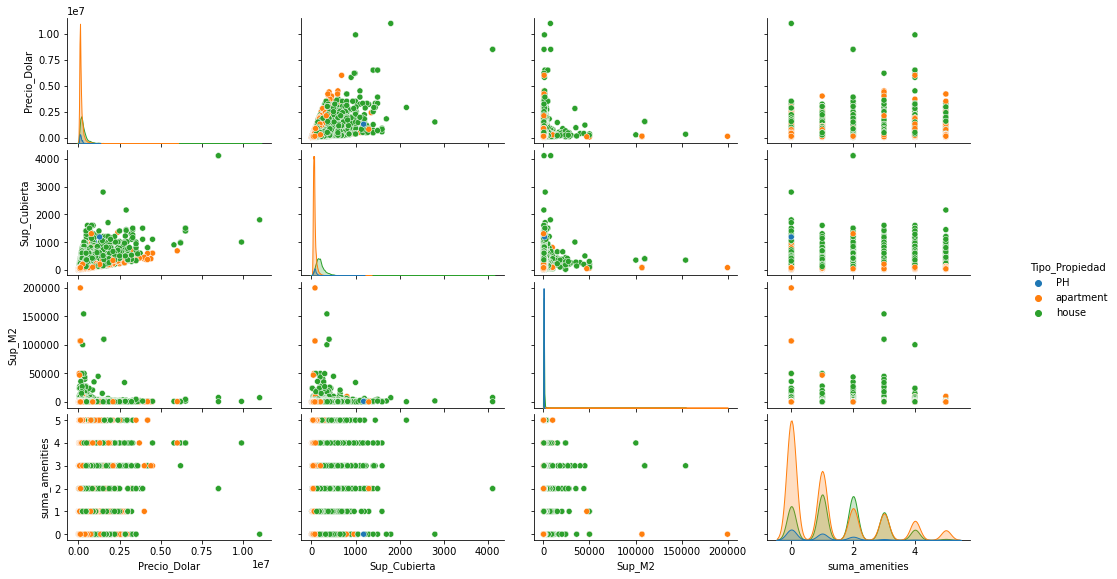

In [56]:
figz= plt.figure()
df_filtrado_sin_store = df_filtrado[df_filtrado.Tipo_Propiedad != "store"]
mask_cols= ["Tipo_Propiedad","Precio_Dolar","Sup_Cubierta","Sup_M2","suma_amenities"]
graph=sns.pairplot(df_filtrado_sin_store[mask_cols],hue="Tipo_Propiedad")
graph.fig.set_size_inches(16,8)
plt.grid()
plt.show()

---------------------------------------------------------------------------------------------------------------------------------

<h3 style='color:#616A6B;font-family:"Bahnschrift SemiBold", sans-serif; font-size:25px'>4. Análisis descriptivo principales variables.</h3>

Faltaría agregar visualizaciones (A evaluar):
- Gráficos de barrios con más propiedades en venta
- Mapa de calor de cantidad de propiedad en venta
- Mapa de calor por 'M2_Promedio'
- Mapa de calor por 'Sup_Cubierta' (ver)
- Barrios más caros
- Barrios más baratos
- Gráfico del valor del m2 según tipos de propiedades
- Histograma del valor del 'M2_Promedio' (opcional: según tipo de propiedad)


Visualizaciones de Barrios con más propiedades en venta

In [57]:
df_mas_prop = df_filtrado.groupby(["Barrio"]).size().reset_index(name="Count").nlargest(10, "Count")
df_mas_prop

Barrio  Count
279        Córdoba   8802
684        Rosario   8359
528  Mar del Plata   6465
784          Tigre   3317
574       Nordelta   3294
148       Belgrano   2968
591        Palermo   2854
448       La Plata   2517
177      Caballito   2255
612          Pilar   2179

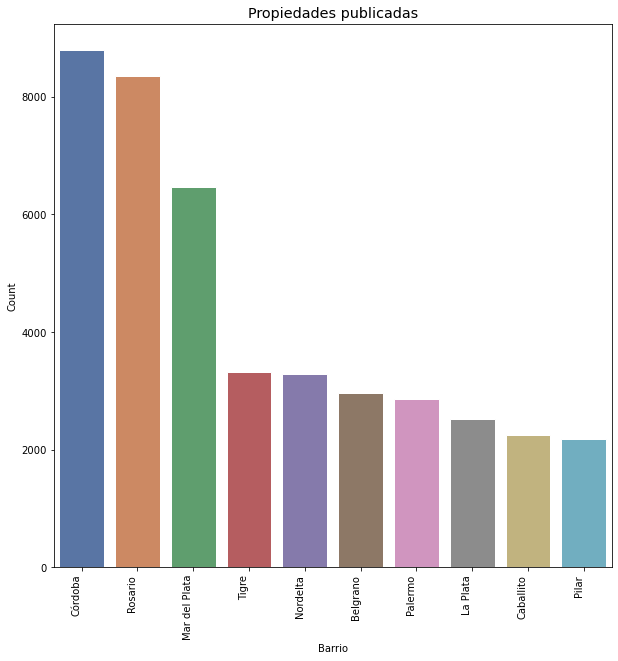

In [58]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="Count", data=df_mas_prop,
            label="Propiedades publicadas")
ax.set_title("Propiedades publicadas", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Visualizaciones de Top 10 Barrios más caros

In [59]:
#En los barrios mas caros y mas baratos filtramos barrios con mas de 5 propiedades para asegurarnos que haya propiedades individuales que generen una distorsion (Ej. Capilla del Rosario)
df_mas_caros =  df_filtrado.groupby(["Barrio","M2_Dolar_Prom"]).size().reset_index(name="Count")
df_mas_caros = df_mas_caros[df_mas_caros.Count > 5].groupby(["Barrio"])[["M2_Dolar_Prom"]].mean().reset_index().nlargest(10, "M2_Dolar_Prom")
df_mas_caros

Barrio  M2_Dolar_Prom
327       Palermo Chico    5872.244154
358       Puerto Madero    5533.374170
275             Manzone    4909.162044
115  Comodoro Rivadavia    4900.433312
271         Manantiales    4325.799271
368            Recoleta    4204.268716
242         Las Cañitas    3922.815584
210     Islas del Canal    3560.762891
330       Palermo Viejo    3502.355553
326             Palermo    3489.358877

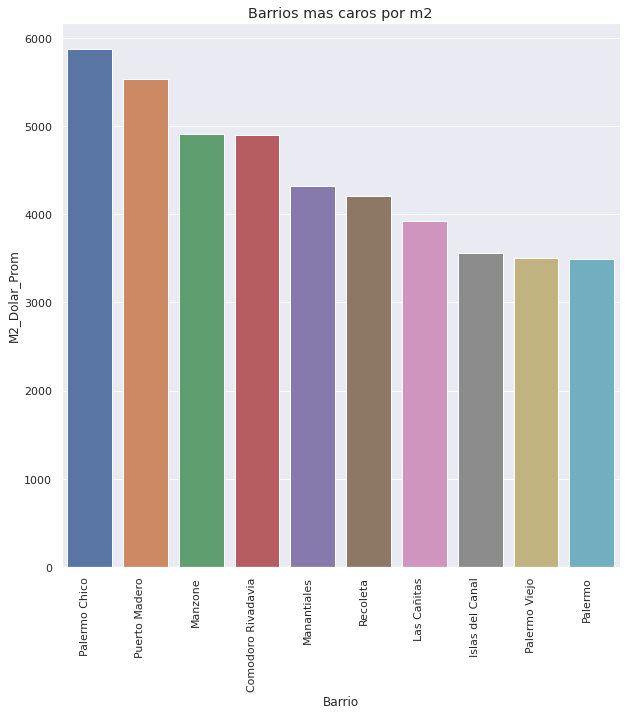

In [60]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="M2_Dolar_Prom", data=df_mas_caros,
            label="Barrios mas caros")
ax.set_title("Barrios mas caros por m2", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Visualizaciones de Top 10 Barrios más baratos

In [61]:
df_mas_baratos =  df_filtrado.groupby(["Barrio","M2_Dolar_Prom"]).size().reset_index(name="Count")
df_mas_baratos = df_mas_baratos[df_mas_baratos.Count > 5].groupby(["Barrio"])[["M2_Dolar_Prom"]].mean().reset_index().nsmallest(10, "M2_Dolar_Prom")
df_mas_baratos

Barrio  M2_Dolar_Prom
142         Dorrego     336.502040
369     Reconquista     396.594831
440  Tafí del Valle     428.455685
370          Recreo     455.773108
140      Don Orione     531.838005
121         Coronda     553.130699
320        Oncativo     564.761582
245       Las Rosas     566.672723
385          Saldán     583.911059
458         Tucumán     643.202949

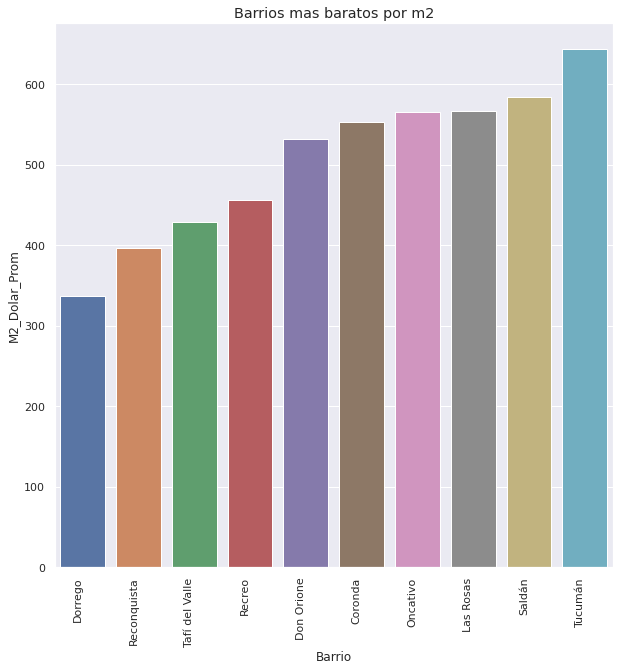

In [62]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="darkgrid")
ax = sns.barplot(x="Barrio", y="M2_Dolar_Prom", data=df_mas_baratos,
            label="Barrios mas baratos")
ax.set_title("Barrios mas baratos por m2", fontsize= 'large')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90,ha="right")
plt.show()

Heatmap de cantidad de propiedades por Provincia y Tipo

In [63]:
df_heatmap_cantidad = df_filtrado.groupby(["Provincia","Tipo_Propiedad"]).size().reset_index(name="Count")
df_heatmap_cantidad

Provincia Tipo_Propiedad  Count
0   Bs.As. G.B.A. Zona Norte             PH    973
1   Bs.As. G.B.A. Zona Norte      apartment  10511
2   Bs.As. G.B.A. Zona Norte          house  13148
3   Bs.As. G.B.A. Zona Norte          store    519
4   Bs.As. G.B.A. Zona Oeste             PH    775
..                       ...            ...    ...
83          Tierra Del Fuego          store      2
84                   Tucumán             PH      1
85                   Tucumán      apartment    410
86                   Tucumán          house    190
87                   Tucumán          store     25

[88 rows x 3 columns]

In [64]:
df_heatmap_pivot_cant = df_heatmap_cantidad.pivot("Provincia", "Tipo_Propiedad", "Count")
df_heatmap_pivot_cant

Tipo_Propiedad                    PH  apartment    house   store
Provincia                                                       
Bs.As. G.B.A. Zona Norte       973.0    10511.0  13148.0   519.0
Bs.As. G.B.A. Zona Oeste       775.0     3492.0   4238.0   216.0
Bs.As. G.B.A. Zona Sur         783.0     5388.0   6804.0   530.0
Buenos Aires Costa Atlántica   561.0     6425.0   2610.0   224.0
Buenos Aires Interior           45.0      820.0   1222.0    46.0
Capital Federal               1782.0    26262.0   1984.0  1244.0
Catamarca                        NaN       12.0     13.0     NaN
Chaco                            NaN       19.0     29.0     3.0
Chubut                           NaN       22.0    124.0     8.0
Corrientes                      57.0      145.0    348.0    20.0
Córdoba                        377.0     6401.0   4190.0   370.0
Entre Ríos                       1.0      137.0    189.0     6.0
Jujuy                            NaN       10.0     14.0     NaN
La Pampa                         NaN       36.0     47.0     6.0
La Rioja                         NaN        NaN      1.0     NaN
Mendoza                          2.0      314.0    305.0    16.0
Misiones                         6.0      184.0    216.0     NaN
Neuquén                        105.0      364.0    214.0     7.0
Río Negro                       23.0      322.0    357.0    71.0
Salta                            NaN      115.0    132.0     1.0
San Juan                         NaN        9.0      7.0     NaN
San Luis                         NaN       35.0    174.0    11.0
Santa Cruz                       NaN        NaN     16.0     1.0
Santa Fe                        72.0     7691.0   1713.0   177.0
Santiago Del Estero              NaN        1.0      2.0     NaN
Tierra Del Fuego                 NaN       12.0     16.0     2.0
Tucumán                          1.0      410.0    190.0    25.0

<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Provincia'>

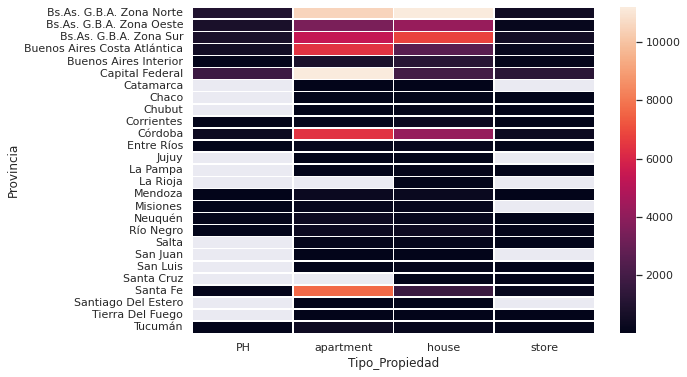

In [65]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_cant, robust=True, linewidths=.5, ax=ax)

Heatmap de M2_Promedio de propiedades por Provincia y Tipo 

In [66]:
df_heatmap_m2_promedio = df_filtrado.groupby(["Provincia","Tipo_Propiedad"])[["M2_Dolar_Prom"]].mean().reset_index()
df_heatmap_m2_promedio

Provincia Tipo_Propiedad  M2_Dolar_Prom
0   Bs.As. G.B.A. Zona Norte             PH    1815.381747
1   Bs.As. G.B.A. Zona Norte      apartment    2761.543780
2   Bs.As. G.B.A. Zona Norte          house    1797.985513
3   Bs.As. G.B.A. Zona Norte          store    1988.098123
4   Bs.As. G.B.A. Zona Oeste             PH    1581.022041
..                       ...            ...            ...
83          Tierra Del Fuego          store    1329.186654
84                   Tucumán             PH    1791.561806
85                   Tucumán      apartment    1390.671370
86                   Tucumán          house     921.443013
87                   Tucumán          store    1291.593540

[88 rows x 3 columns]

In [67]:
df_heatmap_pivot_m2_prom = df_heatmap_m2_promedio.pivot("Provincia", "Tipo_Propiedad", "M2_Dolar_Prom")
df_heatmap_pivot_m2_prom

Tipo_Propiedad                         PH    apartment        house  \
Provincia                                                             
Bs.As. G.B.A. Zona Norte      1815.381747  2761.543780  1797.985513   
Bs.As. G.B.A. Zona Oeste      1581.022041  1859.038128  1462.509793   
Bs.As. G.B.A. Zona Sur        1547.434832  1908.931685  1470.803000   
Buenos Aires Costa Atlántica  1269.415746  1945.365324  1242.373755   
Buenos Aires Interior         1447.322666  2109.751884  1240.894791   
Capital Federal               2332.288976  3106.100460  2119.625215   
Catamarca                             NaN  4325.799271  1500.820208   
Chaco                                 NaN  1564.817745   950.048040   
Chubut                                NaN  2445.729393  1893.490930   
Corrientes                    1354.042793  2097.412748  1360.696158   
Córdoba                       2995.306629  1640.920327  1267.941666   
Entre Ríos                     474.554154  1431.261181  1414.995122   
Jujuy                                 NaN  1128.431666  3732.999210   
La Pampa                              NaN  1611.248188   821.695301   
La Rioja                              NaN          NaN   544.444444   
Mendoza                       1226.216814  1505.588882  1250.744526   
Misiones                       738.086399  1339.894024  1399.169406   
Neuquén                       2279.576327  2217.763167  1778.913405   
Río Negro                     1748.617672  2409.794051  1447.458114   
Salta                                 NaN  1237.033825  1196.176470   
San Juan                              NaN  1393.196101  2002.528774   
San Luis                              NaN  1540.385395  1492.162523   
Santa Cruz                            NaN          NaN   937.320248   
Santa Fe                      1394.493753  1755.445017  1176.903200   
Santiago Del Estero                   NaN   644.365532  1040.000000   
Tierra Del Fuego                      NaN  1969.678011  1383.761104   
Tucumán                       1791.561806  1390.671370   921.443013   

Tipo_Propiedad                      store  
Provincia                                  
Bs.As. G.B.A. Zona Norte      1988.098123  
Bs.As. G.B.A. Zona Oeste      2217.046131  
Bs.As. G.B.A. Zona Sur        1996.931763  
Buenos Aires Costa Atlántica  1663.826563  
Buenos Aires Interior         1483.113715  
Capital Federal               3052.308276  
Catamarca                             NaN  
Chaco                         1220.982511  
Chubut                        1924.693075  
Corrientes                    2174.025274  
Córdoba                       1719.659573  
Entre Ríos                    1934.407409  
Jujuy                                 NaN  
La Pampa                      1047.173485  
La Rioja                              NaN  
Mendoza                       1961.513047  
Misiones                              NaN  
Neuquén                       2204.413047  
Río Negro                     1856.869631  
Salta                          448.669400  
San Juan                              NaN  
San Luis                      2257.045634  
Santa Cruz                     504.753050  
Santa Fe                      1933.138625  
Santiago Del Estero                   NaN  
Tierra Del Fuego              1329.186654  
Tucumán                       1291.593540

<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Provincia'>

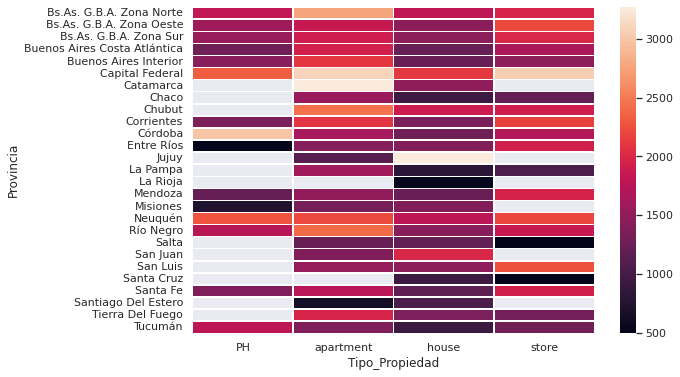

In [68]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_m2_prom, robust=True, linewidths=.5, ax=ax)

Heatmap de Superficie cubierta por Provincia y Tipo de Propiedad

In [69]:
df_heatmap_sup_cubierta = df_filtrado.groupby(["Provincia","Tipo_Propiedad"])[["Sup_Cubierta"]].mean().reset_index()
df_heatmap_sup_cubierta

Provincia Tipo_Propiedad  Sup_Cubierta
0   Bs.As. G.B.A. Zona Norte             PH     84.124563
1   Bs.As. G.B.A. Zona Norte      apartment     70.728847
2   Bs.As. G.B.A. Zona Norte          house    238.531826
3   Bs.As. G.B.A. Zona Norte          store    485.242584
4   Bs.As. G.B.A. Zona Oeste             PH     79.266404
..                       ...            ...           ...
83          Tierra Del Fuego          store    398.500000
84                   Tucumán             PH     72.000000
85                   Tucumán      apartment     72.237079
86                   Tucumán          house    219.152026
87                   Tucumán          store    295.780000

[88 rows x 3 columns]

In [70]:
df_heatmap_pivot_sup_cubierta = df_heatmap_sup_cubierta.pivot("Provincia", "Tipo_Propiedad", "Sup_Cubierta")
df_heatmap_pivot_sup_cubierta

Tipo_Propiedad                        PH   apartment       house       store
Provincia                                                                   
Bs.As. G.B.A. Zona Norte       84.124563   70.728847  238.531826  485.242584
Bs.As. G.B.A. Zona Oeste       79.266404   52.545036  164.672696  416.735286
Bs.As. G.B.A. Zona Sur         81.225301   64.603071  184.927728  345.602486
Buenos Aires Costa Atlántica   76.027915   60.621976  184.371259  235.329231
Buenos Aires Interior          83.441667   67.703195  172.204756  254.999164
Capital Federal                92.933431   70.075718  252.445078  256.438334
Catamarca                            NaN  311.818182  205.747253         NaN
Chaco                                NaN   79.624060  182.675862  418.000000
Chubut                               NaN   71.041667  154.158743  652.937500
Corrientes                     83.523860   74.948830  191.795634  191.325000
Córdoba                        79.165105   62.601402  206.701918  208.225609
Entre Ríos                    130.000000   65.197798  132.401110  512.500000
Jujuy                                NaN   59.500000  126.226190         NaN
La Pampa                             NaN   50.848765  138.382979  373.333333
La Rioja                             NaN         NaN   90.000000         NaN
Mendoza                       189.500000   82.212237  213.159557  330.453125
Misiones                      123.500000   68.761302  131.061549         NaN
Neuquén                        57.397518   61.833674  180.762395  407.857143
Río Negro                      67.913043   79.737993  234.518081  206.281019
Salta                                NaN   75.045698  205.429293  400.000000
San Juan                             NaN   89.833333  315.494505         NaN
San Luis                             NaN   87.257143  135.435632  304.219251
Santa Cruz                           NaN         NaN  171.837500  200.000000
Santa Fe                       63.973577   58.164695  147.687295  132.456771
Santiago Del Estero                  NaN   47.000000  275.000000         NaN
Tierra Del Fuego                     NaN   63.500000  135.500000  398.500000
Tucumán                        72.000000   72.237079  219.152026  295.780000

<AxesSubplot:xlabel='Tipo_Propiedad', ylabel='Provincia'>

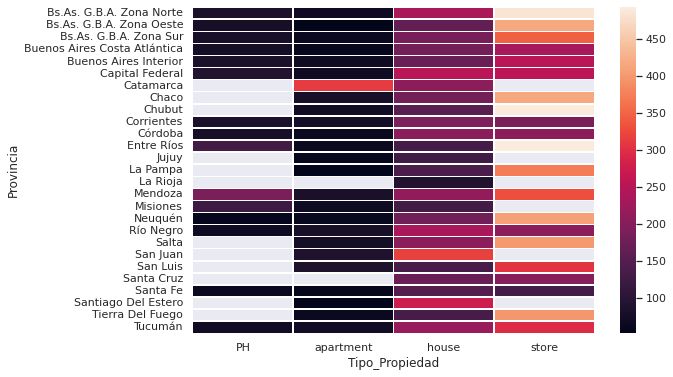

In [71]:
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(df_heatmap_pivot_sup_cubierta, robust=True, linewidths=.5, ax=ax)

Valor del M2 según tipo de propiedad

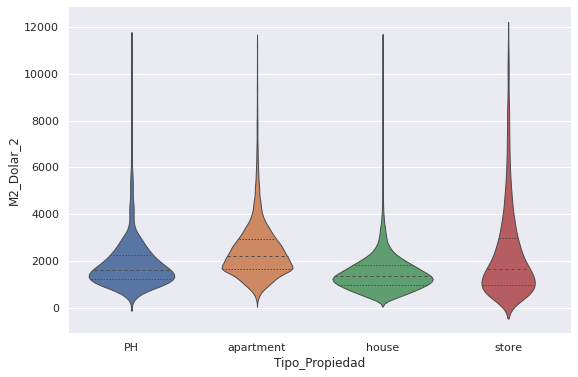

In [72]:
f, ax = plt.subplots(figsize=(9, 6))
sns.violinplot(data=df_filtrado, x="Tipo_Propiedad", y="M2_Dolar_2",
               split=True, inner="quart", linewidth=1)
sns.despine(left=True)

Histograma de M2 Promedio

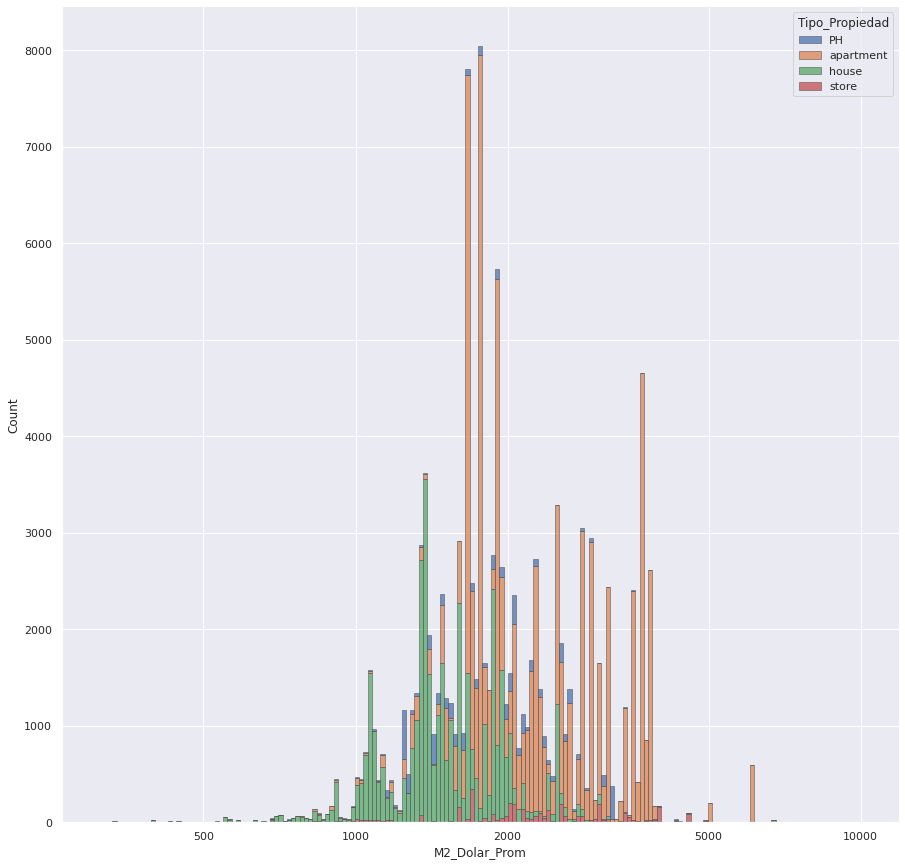

In [73]:
import matplotlib as mpl
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_filtrado,
    x="M2_Dolar_Prom", hue="Tipo_Propiedad",
    multiple="stack",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

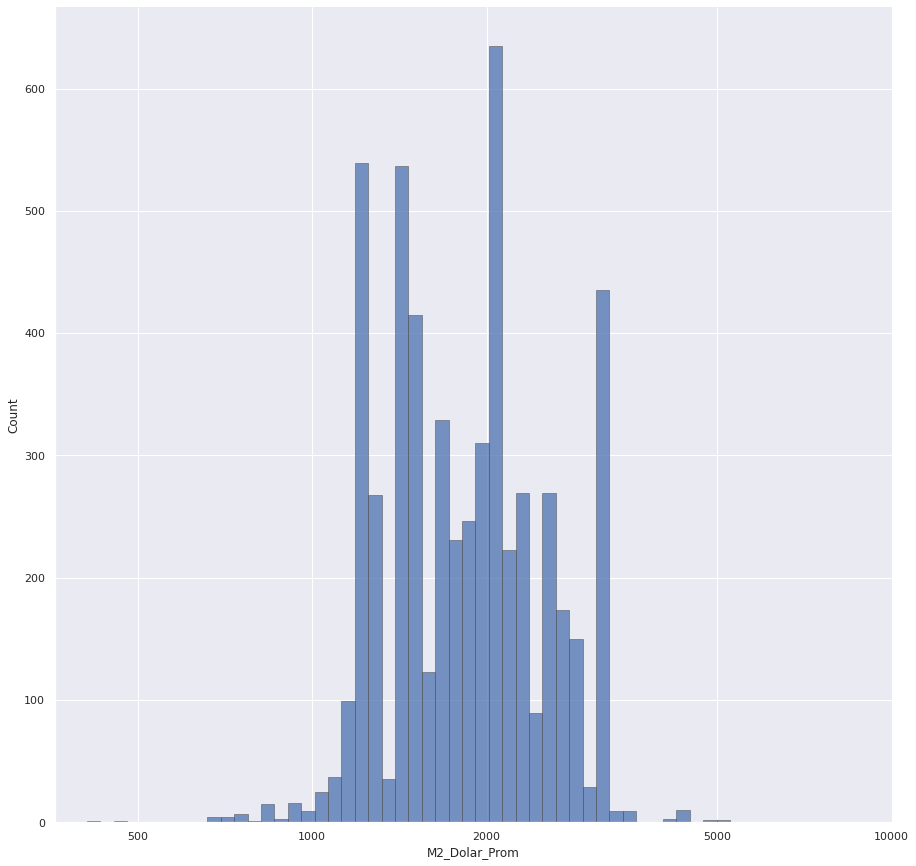

In [74]:
df_PH = df_filtrado[df_filtrado["Tipo_Propiedad"] == "PH"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_PH,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

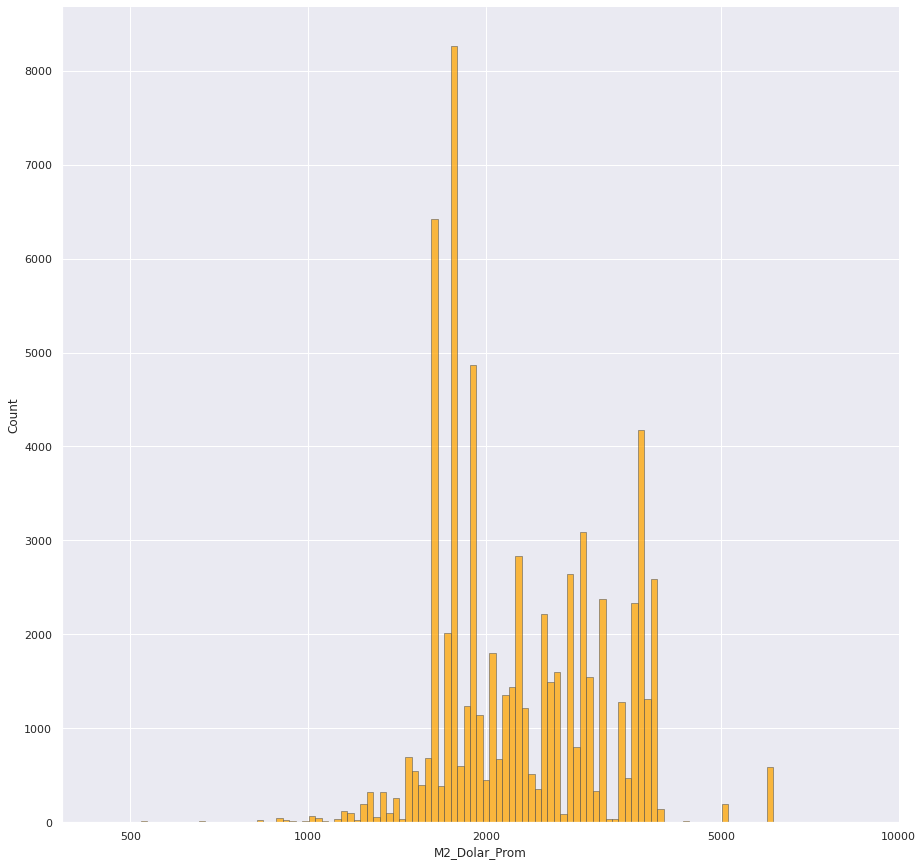

In [75]:
df_apartment = df_filtrado[df_filtrado["Tipo_Propiedad"] == "apartment"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_apartment,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="orange"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

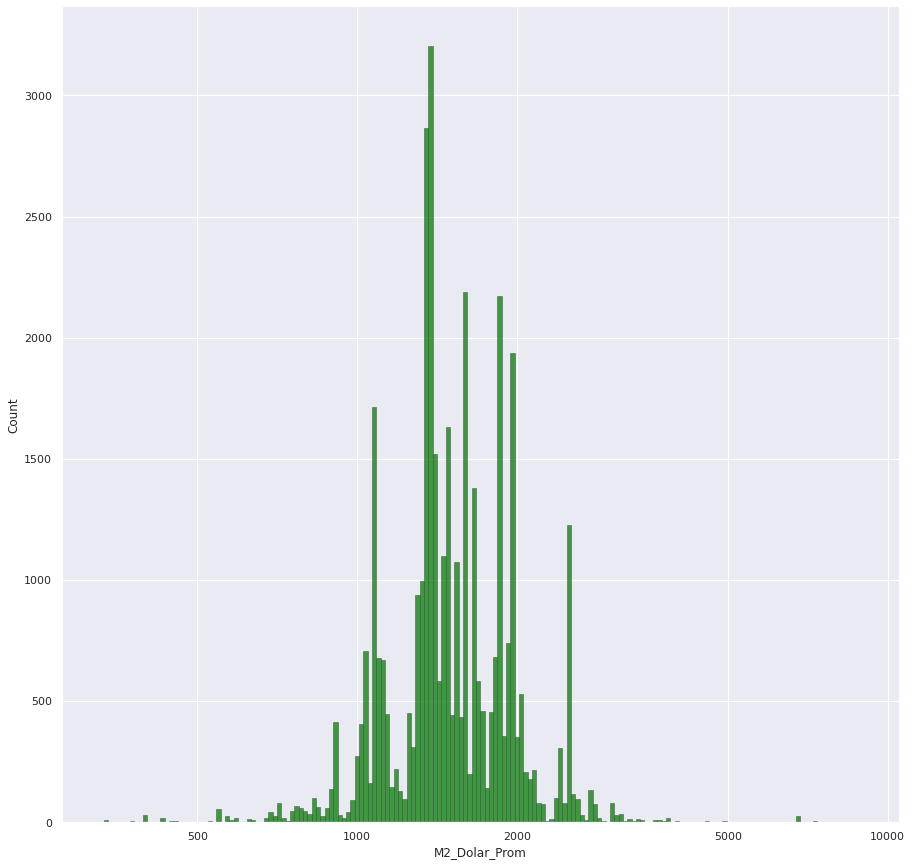

In [76]:
df_house = df_filtrado[df_filtrado["Tipo_Propiedad"] == "house"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_house,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="green"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Histograma de M2 Promedio PH

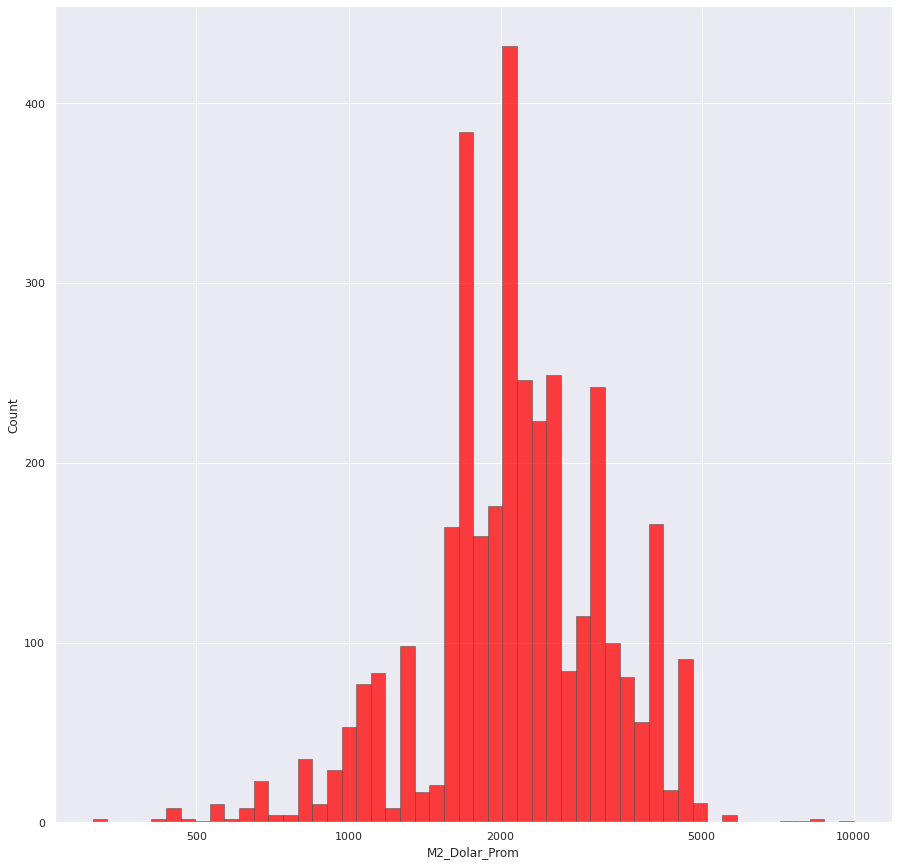

In [77]:
df_store = df_filtrado[df_filtrado["Tipo_Propiedad"] == "store"]
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style="darkgrid")
sns.despine(f)

sns.histplot(
    df_store,
    x="M2_Dolar_Prom",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
    color="red"
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])

Visualización Geográfica de las Propiedades en venta (solo aquellas con las que tiene long-lat)

In [78]:
#Porcentaje de propiedades con información geográfica por Provincia
df_con_geo = df_filtrado.groupby("Provincia").apply(lambda x: x.Lat.notnull().mean()*100)
df_con_geo

Provincia
Bs.As. G.B.A. Zona Norte         44.479345
Bs.As. G.B.A. Zona Oeste         58.468066
Bs.As. G.B.A. Zona Sur           42.754535
Buenos Aires Costa Atlántica     82.148676
Buenos Aires Interior            67.510549
Capital Federal                  74.449987
Catamarca                         4.000000
Chaco                            70.588235
Chubut                           12.337662
Corrientes                        1.052632
Córdoba                          40.597989
Entre Ríos                       69.069069
Jujuy                            87.500000
La Pampa                         62.921348
La Rioja                        100.000000
Mendoza                          48.351648
Misiones                         80.049261
Neuquén                          67.681159
Río Negro                        54.851229
Salta                            75.000000
San Juan                         68.750000
San Luis                         50.454545
Santa Cruz                       88.235294
S

In [79]:
df_filtrado_con_geo = df_filtrado[(df_filtrado.Lat.isnull() == False) | (df_filtrado.Lon.isnull() == False)]
df_filtrado_con_geo.shape

(66777, 19)

In [80]:
import geopandas as gpd
import descartes
import contextily as ctx
geo_df_filtrado = gpd.GeoDataFrame(df_filtrado_con_geo, geometry=gpd.points_from_xy(df_filtrado_con_geo.Lon, df_filtrado_con_geo.Lat))
geo_df_filtrado.head(5)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/geopandas/array.py:275: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.points_from_xy(x, y, z), crs=crs)


Tipo_Propiedad     Barrio  \
0             PH  Mataderos   
1      apartment   La Plata   
2      apartment  Mataderos   
3             PH    Liniers   
4      apartment     Centro   

                                    Barrio_Pcia_Pais       País  \
0              |Argentina|Capital Federal|Mataderos|  Argentina   
1        |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|  Argentina   
2              |Argentina|Capital Federal|Mataderos|  Argentina   
3                |Argentina|Capital Federal|Liniers|  Argentina   
4  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                      Provincia                  Lat-Lon        Lat  \
0               Capital Federal  -34.6618237,-58.5088387 -34.661824   
1        Bs.As. G.B.A. Zona Sur  -34.9038831,-57.9643295 -34.903883   
2               Capital Federal  -34.6522615,-58.5229825 -34.652262   
3               Capital Federal  -34.6477969,-58.5164244 -34.647797   
4  Buenos Aires Costa Atlántica  -38.0026256,-57.5494468 -38.002626   

         Lon  Precio_Dolar      Sup_M2  Sup_Cubierta     M2_Dolar  \
0 -58.508839       62000.0   55.000000     40.000000  1127.272727   
1 -57.964330      150000.0   68.867347     66.915126          NaN   
2 -58.522982       72000.0   55.000000     55.000000  1309.090909   
3 -58.516424       95000.0  107.980392     70.016667          NaN   
4 -57.549447       64000.0   35.000000     35.000000  1828.571429   

   Dormitorios                                        Descripcion  \
0          1.0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1          2.0  Venta de departamento en décimo piso al frente...   
2          2.0  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
3          3.0  PH 3 ambientes con patio. Hay 3 deptos en lote...   
4          1.0  DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...   

                                              Titulo  Espacio_Descubierto  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB                    1   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...                    1   
2           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO                    0   
3                       PH 3 amb. cfte. reciclado                       1   
4  DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...                    0   

    M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
0  1550.000000    1988.965879               0  POINT (-58.50884 -34.66182)  
1  2241.645632    1703.091783               1  POINT (-57.96433 -34.90388)  
2  1309.090909    2135.501737               0  POINT (-58.52298 -34.65226)  
3  1356.819805    2062.630423               0  POINT (-58.51642 -34.64780)  
4  1828.571429    1905.514948               0  POINT (-57.54945 -38.00263)

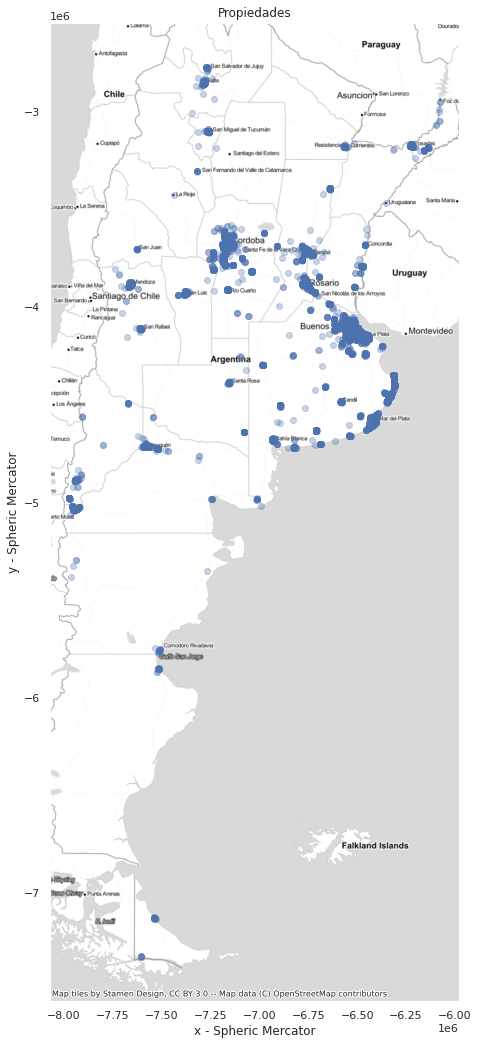

In [81]:
fig, ax = plt.subplots(figsize=(12,18))
ax.set_title('Propiedades')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_filtrado.crs = "EPSG:4326"                        
geo_df_filtrado_3857 = geo_df_filtrado.to_crs(epsg=3857)       
geo_df_filtrado_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Visualización geográfica 5 principales Barrios

Córdoba

In [82]:
geo_df_Cordoba = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Córdoba|Córdoba|"]
geo_df_Cordoba.head()

Tipo_Propiedad   Barrio             Barrio_Pcia_Pais       País Provincia  \
9           house  Córdoba  |Argentina|Córdoba|Córdoba|  Argentina   Córdoba   
31      apartment  Córdoba  |Argentina|Córdoba|Córdoba|  Argentina   Córdoba   
85          house  Córdoba  |Argentina|Córdoba|Córdoba|  Argentina   Córdoba   
86      apartment  Córdoba  |Argentina|Córdoba|Córdoba|  Argentina   Córdoba   
87          house  Córdoba  |Argentina|Córdoba|Córdoba|  Argentina   Córdoba   

                    Lat-Lon        Lat        Lon  Precio_Dolar       Sup_M2  \
9   -31.4200833,-64.1887761 -31.420083 -64.188776      70000.00  1514.000000   
31  -31.4053736,-64.1562667 -31.405374 -64.156267      30846.02    50.000000   
85  -31.4253708,-64.1577465 -31.425371 -64.157747     875000.00   318.605302   
86   -31.4283549,-64.205149 -31.428355 -64.205149      50000.00    75.494173   
87  -31.3356946,-64.2796676 -31.335695 -64.279668     260000.00   318.605302   

    Sup_Cubierta    M2_Dolar  Dormitorios  \
9     202.143562   46.235139          4.0   
31     50.000000  616.920400          3.0   
85    170.000000         NaN          2.0   
86     53.000000         NaN          1.0   
87    202.143562         NaN          3.0   

                                          Descripcion  \
9   Hermosa casa sin terminar de 3 dormitorios, ba...   
31  EN VENTA, departamento ubicado en barrio Pueyr...   
85                Casa en Venta de 3 dorm. en Cordoba   
86        Departamento en Venta de 1 dorm. en Cordoba   
87                           Casa en Venta en Cordoba   

                                               Titulo  Espacio_Descubierto  \
9   Casa sin terminar en Falda de Cañete.         ...                    1   
31       Departamento apto crédito! Barrio Pueyrredon                    0   
85                Casa en Venta de 3 dorm. en Cordoba                    1   
86           Muy amplio departamento sobre Julio A. R                    1   
87           ZONA NORTE ESPEC. CASA EN VILLA QUISQUIS                    1   

     M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
9    346.288545    1365.143724               1  POINT (-64.18878 -31.42008)  
31   616.920400    1652.302189               0  POINT (-64.15627 -31.40537)  
85  5147.058824    1365.143724               0  POINT (-64.15775 -31.42537)  
86   943.396226    1652.302189               0  POINT (-64.20515 -31.42835)  
87  1286.214597    1365.143724               0  POINT (-64.27967 -31.33569)

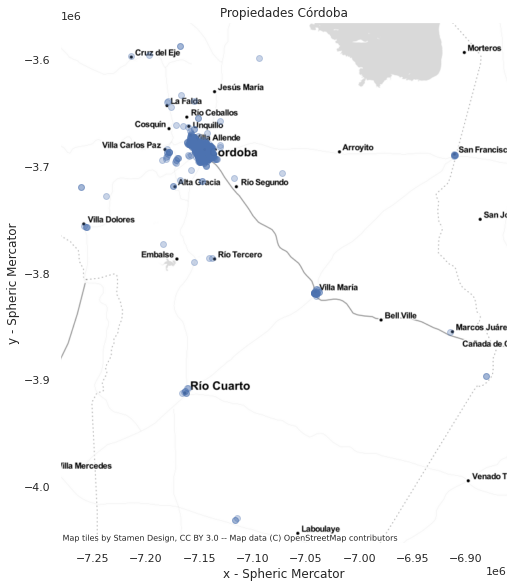

In [83]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Córdoba')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Cordoba.crs = "EPSG:4326"                        
geo_df_Cordoba_3857 = geo_df_Cordoba.to_crs(epsg=3857)       
geo_df_Cordoba_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Rosario

In [84]:
geo_df_Rosario = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Santa Fe|Rosario|"]
geo_df_Rosario.head()

Tipo_Propiedad   Barrio              Barrio_Pcia_Pais       País Provincia  \
63          house  Rosario  |Argentina|Santa Fe|Rosario|  Argentina  Santa Fe   
81      apartment  Rosario  |Argentina|Santa Fe|Rosario|  Argentina  Santa Fe   
82      apartment  Rosario  |Argentina|Santa Fe|Rosario|  Argentina  Santa Fe   
83      apartment  Rosario  |Argentina|Santa Fe|Rosario|  Argentina  Santa Fe   
95      apartment  Rosario  |Argentina|Santa Fe|Rosario|  Argentina  Santa Fe   

                          Lat-Lon        Lat        Lon   Precio_Dolar  \
63  -32.9196695354,-60.7594185772 -32.919670 -60.759419  300000.000000   
81   -32.954876705,-60.6518377614 -32.954877 -60.651838   95639.297848   
82        -32.9327656,-60.6533854 -32.932766 -60.653385   95639.297848   
83        -32.9588372,-60.6456409 -32.958837 -60.645641   95639.297848   
95  -32.9352296652,-60.6710860036 -32.935230 -60.671086   95639.297848   

    Sup_M2  Sup_Cubierta    M2_Dolar  Dormitorios  \
63  1085.0    260.000000  276.497696          6.0   
81    55.0     55.000000         NaN          2.0   
82    55.0     55.000000         NaN          2.0   
83    63.0     63.000000         NaN          1.0   
95     0.0     57.239986         NaN          2.0   

                                          Descripcion  \
63  CODIGO: 2366-346 ubicado en: ALDEA -  Publicad...   
81  IDEAL INVERSORES o ESTUDIANTES APTA CREDITO An...   
82  Departamento en PB con cocina comedor separado...   
83  Corrientes 1900 – 1º Piso Departamento de 1 do...   
95  San Nicolás 365ENTREGA INMEDIATA.Edificio de e...   

                                               Titulo  Espacio_Descubierto  \
63  Espectacular casa en venta. Malabia y La Repúb...                    1   
81                2 Dormitorios. Dorrego y Pellegrini                    0   
82                      2 Dormitorios. Güemes al 2400                    0   
83  Corrientes 1900 – 1º Piso  1 dormitorio (semip...                    0   
95  Rosario - San Nicolas 300 - Venta Deptos 1 Dor...                    0   

     M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
63  1153.846154    1404.953606               3  POINT (-60.75942 -32.91967)  
81  1738.896325    1776.426323               0  POINT (-60.65184 -32.95488)  
82  1738.896325    1776.426323               1  POINT (-60.65339 -32.93277)  
83  1518.084093    1776.426323               0  POINT (-60.64564 -32.95884)  
95  1670.847680    1776.426323               1  POINT (-60.67109 -32.93523)

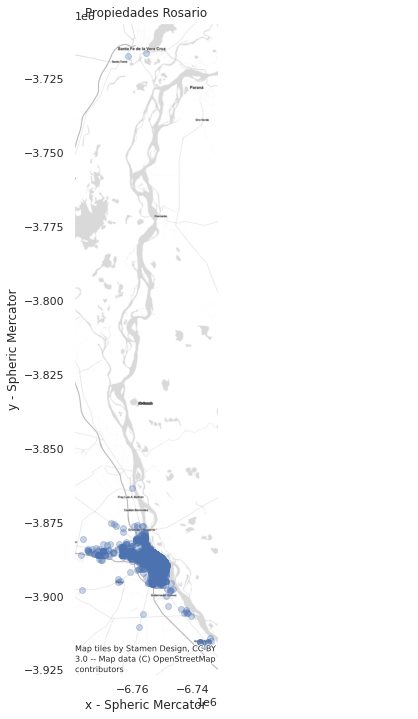

In [85]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Rosario')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Rosario.crs = "EPSG:4326"                        
geo_df_Rosario_3857 = geo_df_Rosario.to_crs(epsg=3857)       
geo_df_Rosario_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Mar del Plata

In [86]:
geo_df_MDQ = geo_df_filtrado[geo_df_filtrado["Barrio_Pcia_Pais"] == "|Argentina|Buenos Aires Costa Atlántica|Mar del Plata|"]
geo_df_MDQ.head()

Tipo_Propiedad         Barrio  \
67      apartment  Mar del Plata   
68          house  Mar del Plata   
69             PH  Mar del Plata   
70             PH  Mar del Plata   
71             PH  Mar del Plata   

                                     Barrio_Pcia_Pais       País  \
67  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   
68  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   
69  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   
70  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   
71  |Argentina|Buenos Aires Costa Atlántica|Mar de...  Argentina   

                       Provincia                  Lat-Lon        Lat  \
67  Buenos Aires Costa Atlántica   -38.034794,-57.5416872 -38.034794   
68  Buenos Aires Costa Atlántica  -38.0150119,-57.5341134 -38.015012   
69  Buenos Aires Costa Atlántica  -37.9765072,-57.5695686 -37.976507   
70  Buenos Aires Costa Atlántica  -37.9765072,-57.5695686 -37.976507   
71  Buenos Aires Costa Atlántica  -37.9765072,-57.5695686 -37.976507   

          Lon  Precio_Dolar     Sup_M2  Sup_Cubierta     M2_Dolar  \
67 -57.541687      235000.0   62.25399     72.000000          NaN   
68 -57.534113      350000.0  332.00000    207.000000  1054.216867   
69 -57.569569       85000.0   78.98893     76.576923          NaN   
70 -57.569569      115000.0   78.98893     76.576923          NaN   
71 -57.569569       62000.0   78.98893     76.576923          NaN   

    Dormitorios                                        Descripcion  \
67          2.0  Cocina integrada con barra ,  horno y anafe .T...   
68          6.0  HERMOSO E IMPECABLE CHALET DE ESTILO CLÁSICO D...   
69          2.0  COMPLETO DE DTOS. EN PH. TRES DTOS DE 2 AMB. E...   
70          3.0  COMPLEjO DE DTOS. EN PH. DOS DTOS DE 3 AMB. EN...   
71          1.0  COMPLETO DE DTOS. EN PH. DOS DTOS DE 1 AMB. LA...   

                                               Titulo  Espacio_Descubierto  \
67  EXCELENTE DEPARTAMENTO CON VISTA AL MAR Y AL GOLF                    0   
68  IMPECABLE CHALET DE ESTILO CLASICO EN EL CORAZ...                    1   
69  COMPLEJO DE DTOS. EN PH. - TRES DTOS DE 2 AMB....                    1   
70  COMPLEJO DTOS. EN PH - DOS DTOS DE 3 AMB. CON ...                    1   
71  COMPLEJO DE DTOS. EN PH - DOS DTOS. DE  1 AMB....                    1   

     M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
67  3263.888889    1903.703544               3  POINT (-57.54169 -38.03479)  
68  1690.821256    1066.918953               1  POINT (-57.53411 -38.01501)  
69  1109.994977    1242.858328               1  POINT (-57.56957 -37.97651)  
70  1501.757911    1242.858328               1  POINT (-57.56957 -37.97651)  
71   809.643395    1242.858328               0  POINT (-57.56957 -37.97651)

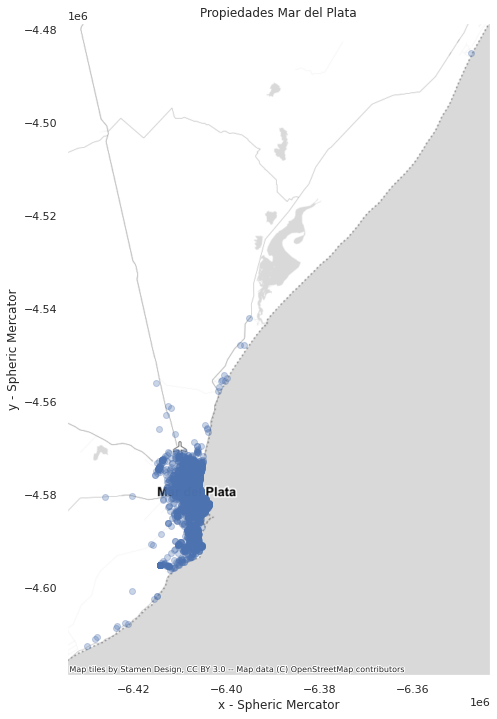

In [87]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Mar del Plata')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_MDQ.crs = "EPSG:4326"                        
geo_df_MDQ_3857 = geo_df_MDQ.to_crs(epsg=3857)       
geo_df_MDQ_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Tigre

In [88]:
geo_df_Tigre = geo_df_filtrado[geo_df_filtrado["Barrio"] == "Tigre"]
geo_df_Tigre.head()

Tipo_Propiedad Barrio                                  Barrio_Pcia_Pais  \
17           house  Tigre        |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
227          house  Tigre        |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
229          house  Tigre        |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
374          house  Tigre        |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|   
397          house  Tigre  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Tigre|   

          País                 Provincia                        Lat-Lon  \
17   Argentina  Bs.As. G.B.A. Zona Norte         -34.425087,-58.5796585   
227  Argentina  Bs.As. G.B.A. Zona Norte  -34.3797634778,-58.6778488076   
229  Argentina  Bs.As. G.B.A. Zona Norte  -34.3806135197,-58.6860885537   
374  Argentina  Bs.As. G.B.A. Zona Norte        -34.3714273,-58.6793104   
397  Argentina  Bs.As. G.B.A. Zona Norte         -34.379324,-58.7177185   

           Lat        Lon  Precio_Dolar  Sup_M2  Sup_Cubierta     M2_Dolar  \
17  -34.425087 -58.579659      570000.0   270.0         270.0  2111.111111   
227 -34.379763 -58.677849      420000.0   300.0         300.0  1400.000000   
229 -34.380614 -58.686089      420000.0   300.0         300.0  1400.000000   
374 -34.371427 -58.679310      390000.0   900.0         200.0   433.333333   
397 -34.379324 -58.717718      365000.0   900.0         220.0   405.555556   

     Dormitorios                                        Descripcion  \
17           6.0  Casa sobre lote al golf en barrio San Isidro L...   
227          6.0  CASA EN VENTA EN SAN ISIDRO LABRADOR. LOTE INT...   
229          6.0  CASA EN VENTA EN SAN ISIDRO LABRADOR. LOTE INT...   
374          4.0  Hermosa casa en barrio privado San Isidro Labr...   
397          5.0  JPL. Santa Teresa 4 dormitorios. La casa se en...   

                                                Titulo  Espacio_Descubierto  \
17   Casa en venta en barrio San Isidro Labrador, T...                    0   
227               CASA EN VENTA EN SAN ISIDRO LABRADOR                    0   
229               CASA EN VENTA EN SAN ISIDRO LABRADOR                    0   
374                          EXCELENTE CASA CON AMARRA                    1   
397                   JPL. Santa Teresa 4 dormitorios.                    1   

      M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
17   2111.111111    1855.040459               1  POINT (-58.57966 -34.42509)  
227  1400.000000    1855.040459               1  POINT (-58.67785 -34.37976)  
229  1400.000000    1855.040459               1  POINT (-58.68609 -34.38061)  
374  1950.000000    1855.040459               2  POINT (-58.67931 -34.37143)  
397  1659.090909    1855.040459               1  POINT (-58.71772 -34.37932)

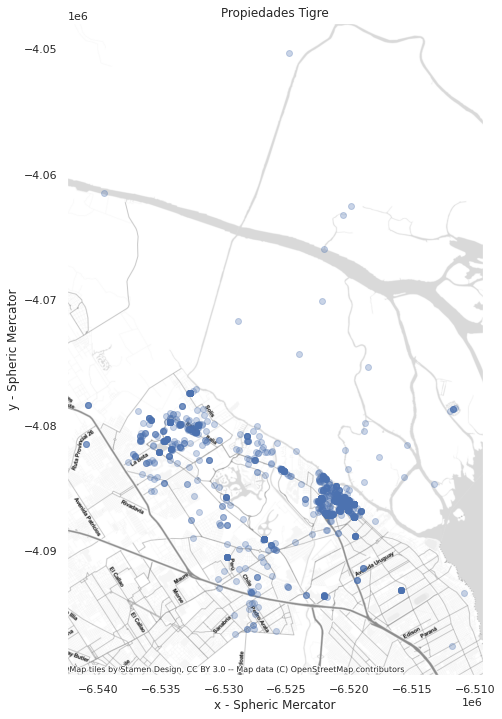

In [89]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Tigre')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Tigre.crs = "EPSG:4326"                        
geo_df_Tigre_3857 = geo_df_Tigre.to_crs(epsg=3857)       
geo_df_Tigre_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 

Nordelta

In [90]:
geo_df_Nordelta = geo_df_filtrado[(geo_df_filtrado["Barrio"] == "Nordelta") & (geo_df_filtrado["Lon"] > -60)] #Existe una propiedad con coordenadas de Bahia Blanca que figura en Nordelta
geo_df_Nordelta.head()

Tipo_Propiedad    Barrio  \
224          house  Nordelta   
395      apartment  Nordelta   
402      apartment  Nordelta   
405      apartment  Nordelta   
554      apartment  Nordelta   

                                      Barrio_Pcia_Pais       País  \
224  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...  Argentina   
395  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...  Argentina   
402  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...  Argentina   
405  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...  Argentina   
554  |Argentina|Bs.As. G.B.A. Zona Norte|Tigre|Nord...  Argentina   

                    Provincia                        Lat-Lon        Lat  \
224  Bs.As. G.B.A. Zona Norte        -34.3967647,-58.6476628 -34.396765   
395  Bs.As. G.B.A. Zona Norte        -34.3967647,-58.6476628 -34.396765   
402  Bs.As. G.B.A. Zona Norte        -34.3967647,-58.6476628 -34.396765   
405  Bs.As. G.B.A. Zona Norte        -34.3967647,-58.6476628 -34.396765   
554  Bs.As. G.B.A. Zona Norte  -34.4046410947,-58.6487591562 -34.404641   

           Lon  Precio_Dolar  Sup_M2  Sup_Cubierta     M2_Dolar  Dormitorios  \
224 -58.647663      650000.0   454.0         343.0  1431.718062          7.0   
395 -58.647663      380000.0   300.0         120.0  1266.666667          3.0   
402 -58.647663      290000.0   120.0         120.0  2416.666667          3.0   
405 -58.647663      300000.0   130.0         115.0  2307.692308          4.0   
554 -58.648759      850000.0   147.0         147.0  5782.312925          4.0   

                                           Descripcion  \
224  HERMOSA CASA EN VENTA EN LA ALAMEDA, 391,51 M2...   
395  Impecable duplex a la Bahia 120mts 3amb2 dormi...   
402  Departamento 3 ambientes de 120M2 aproximados ...   
405  Increíble opción de 4 ambientes en el complejo...   
554  YOO NORDELTA ES UN PROYECTO DE CARLOS OTT, CON...   

                                         Titulo  Espacio_Descubierto  \
224                 CASA EN VENTA EN LA ALAMEDA                    1   
395                  Impecable dpto en La Bahia                    1   
402          Excelente departamento en La Bahia                    0   
405                    Excelente Quartier 4 amb                    1   
554  Condominio Yoo Nordelta - Nordelta - Tigre                    0   

      M2_Dolar_2  M2_Dolar_Prom  suma_amenities                     geometry  
224  1895.043732    2523.200777               3  POINT (-58.64766 -34.39676)  
395  3166.666667    3128.850469               1  POINT (-58.64766 -34.39676)  
402  2416.666667    3128.850469               5  POINT (-58.64766 -34.39676)  
405  2608.695652    3128.850469               2  POINT (-58.64766 -34.39676)  
554  5782.312925    3128.850469               0  POINT (-58.64876 -34.40464)

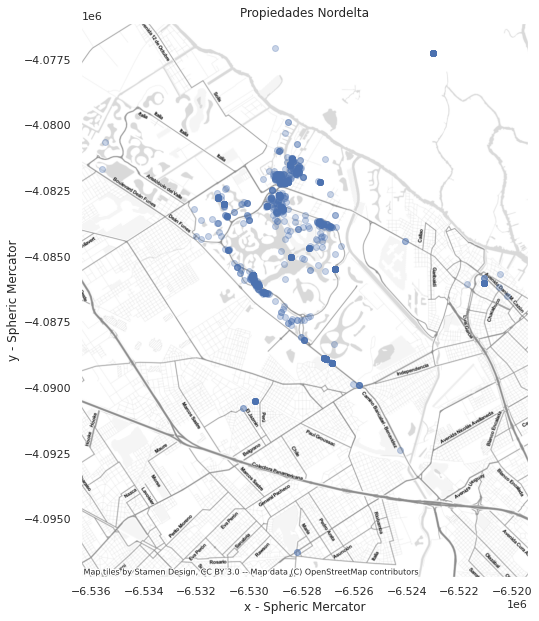

In [91]:
fig, ax = plt.subplots(figsize=(8,12))
ax.set_title('Propiedades Nordelta')
ax.set_xlabel('x - Spheric Mercator')
ax.set_ylabel('y - Spheric Mercator')
plt.grid()

geo_df_Nordelta.crs = "EPSG:4326"                        
geo_df_Nordelta_3857 = geo_df_Nordelta.to_crs(epsg=3857)       
geo_df_Nordelta_3857.plot(ax=ax,
                   legend = True,
                   alpha=0.3)

ctx.add_basemap(ax, source=ctx.providers.Stamen.TonerLite) 